In [133]:
import numpy as np
%pylab inline
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
from glob import glob, iglob
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from itertools import product
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Populating the interactive namespace from numpy and matplotlib


Загружаем данные

In [488]:
common_table=pd.read_pickle('selected_regions.pkl')
common_table.index=pd.to_datetime(common_table.index)

In [489]:
common_table.head()

1076  1077  1078  1126  1127  1128  1129  1130  1131  \
2015-06-01 00:00:00    32     7     1    60   129   153   271   294    70   
2015-06-01 01:00:00    20     5     0    38    90   111   163   246    28   
2015-06-01 02:00:00     5     0     1    25    47    97   139   207    25   
2015-06-01 03:00:00     6     0     0    27    26    68    77   208    29   
2015-06-01 04:00:00    16     2     0    21    39    53    81   109     8   

                     1132  ...   1631  1685  1734  1735  1784  2069  2070  \
2015-06-01 00:00:00     4  ...      0     0   639     0     0    15     4   
2015-06-01 01:00:00     5  ...      4     0   547     0     0    21     5   
2015-06-01 02:00:00     4  ...      4     0   234     0     0    69     0   
2015-06-01 03:00:00     0  ...      1     0    84     0     0     6     0   
2015-06-01 04:00:00     1  ...      9     0     9     0     0     5     1   

                     2119  2120  2169  
2015-06-01 00:00:00    90     2     0  
2015-06-01 01:00:00   124     0     0  
2015-06-01 02:00:00   105     0     0  
2015-06-01 03:00:00     3     0     0  
2015-06-01 04:00:00     1     0     0  

[5 rows x 102 columns]

Выбираем данные только по апрель включительно

In [490]:
data=common_table[:'2016-04-30 23:00:00']

Стандартизируем значения

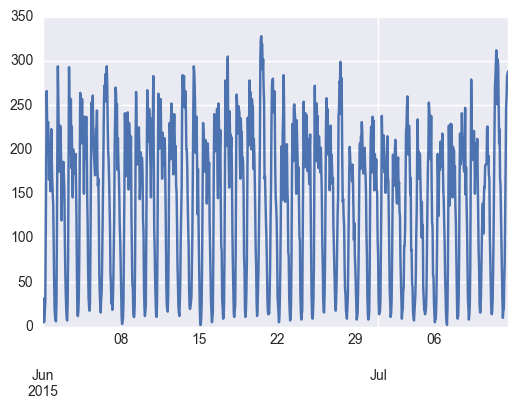

In [29]:
data['1076'][:1000].plot()

In [376]:
scaler=StandardScaler()
data[data.columns]=scaler.fit_transform(data[data.columns])

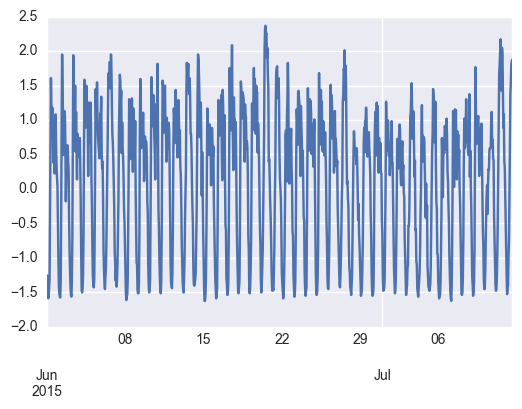

In [31]:
data['1076'][:1000].plot()

Проведем класторизацию, используем K-means

In [39]:
cluster=KMeans()
clust=cluster.fit_predict(data.values.T)

In [71]:
clustcenters=cluster.cluster_centers_

In [118]:
add_data=pd.DataFrame(data=clustcenters.T, columns=cols)
add_data.set_index(data.index,inplace=True)
data=data.join(add_data)

Получили 8 кластеров

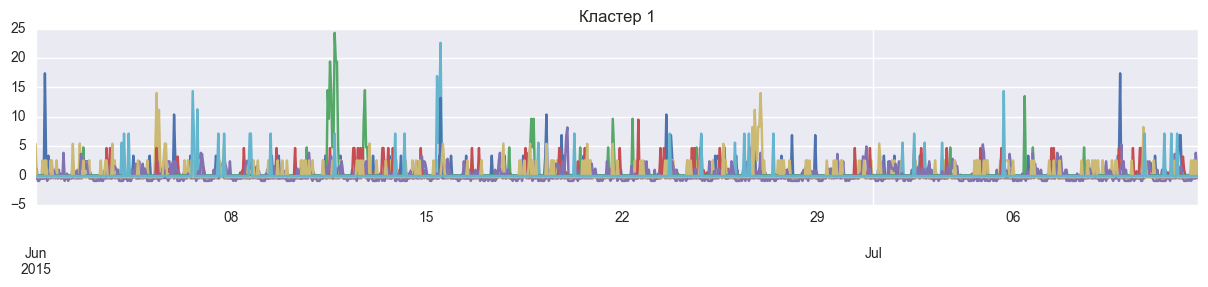

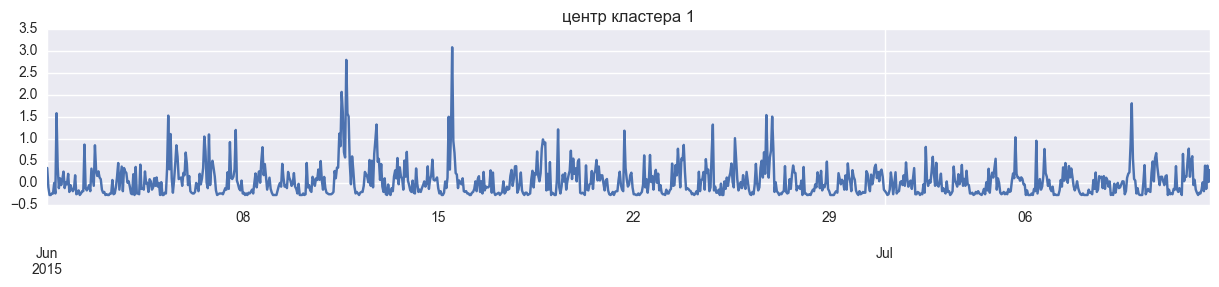

In [124]:
plt.figure(figsize(15,5))
ax = plt.subplot(211)
data[data.columns[np.argwhere(clust==0)[:,0]]][:1000].plot(ax=ax,legend=False)
plt.title(u'Кластер 1')
plt.show()
ax = plt.subplot(212)
data['cl1'][:1000].plot(ax=ax,legend=False)
plt.title(u'центр кластера 1')
plt.show()

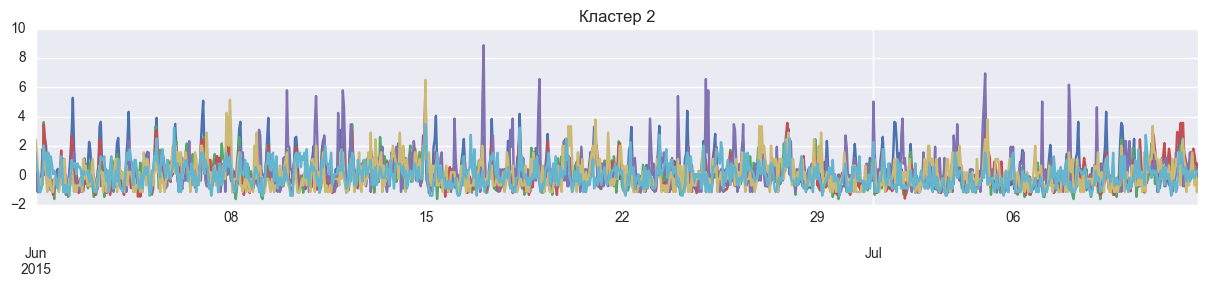

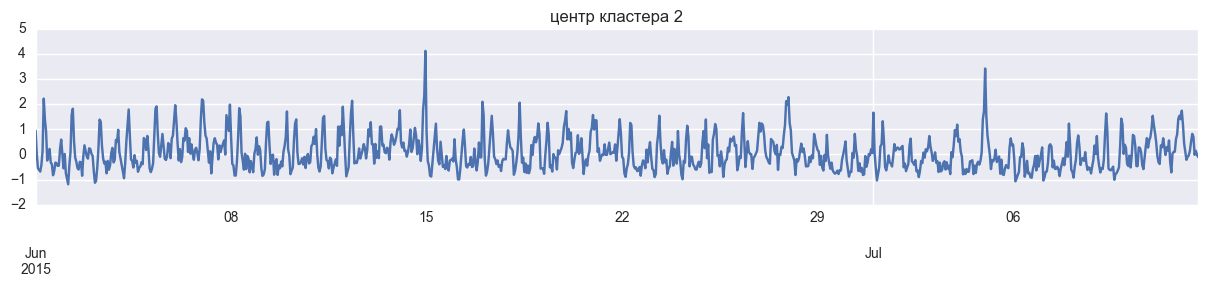

In [125]:
plt.figure(figsize(15,5))
ax = plt.subplot(211)
data[data.columns[np.argwhere(clust==1)[:,0]]][:1000].plot(ax=ax,legend=False)
plt.title(u'Кластер 2')
plt.show()
ax = plt.subplot(212)
data['cl2'][:1000].plot(ax=ax,legend=False)
plt.title(u'центр кластера 2')
plt.show()

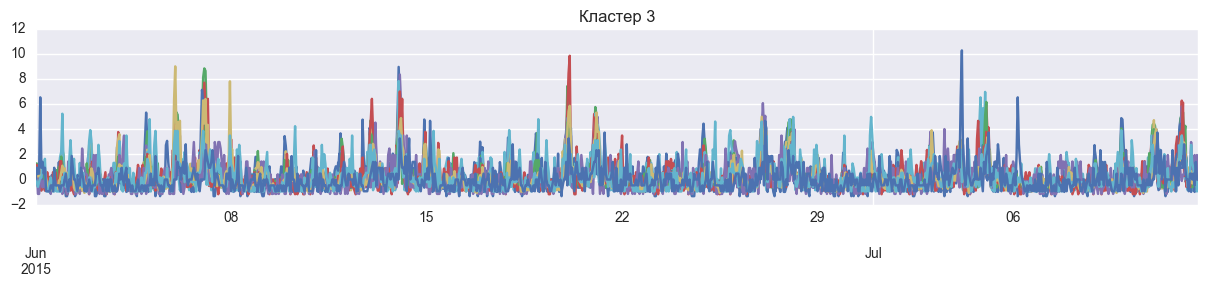

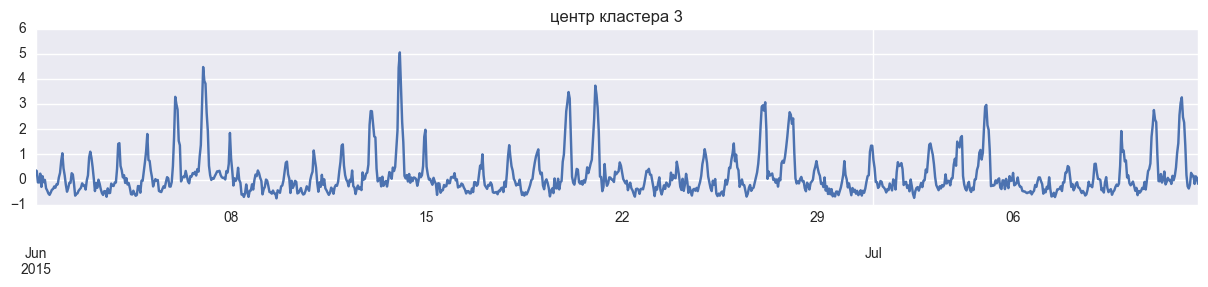

In [126]:
plt.figure(figsize(15,5))
ax = plt.subplot(211)
data[data.columns[np.argwhere(clust==2)[:,0]]][:1000].plot(ax=ax,legend=False)
plt.title(u'Кластер 3')
plt.show()
ax = plt.subplot(212)
data['cl3'][:1000].plot(ax=ax,legend=False)
plt.title(u'центр кластера 3')
plt.show()

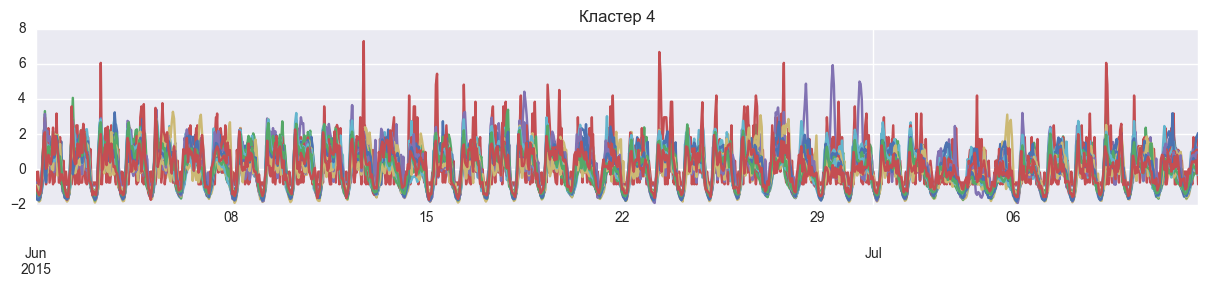

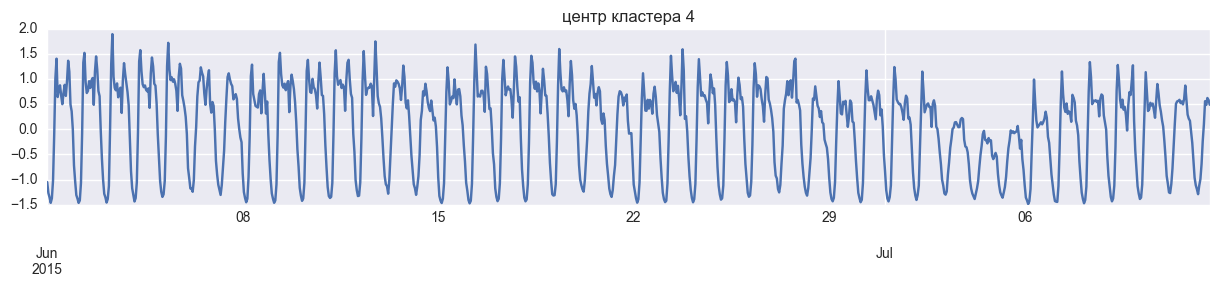

In [127]:
plt.figure(figsize(15,5))
ax = plt.subplot(211)
data[data.columns[np.argwhere(clust==3)[:,0]]][:1000].plot(ax=ax,legend=False)
plt.title(u'Кластер 4')
plt.show()
ax = plt.subplot(212)
data['cl4'][:1000].plot(ax=ax,legend=False)
plt.title(u'центр кластера 4')
plt.show()

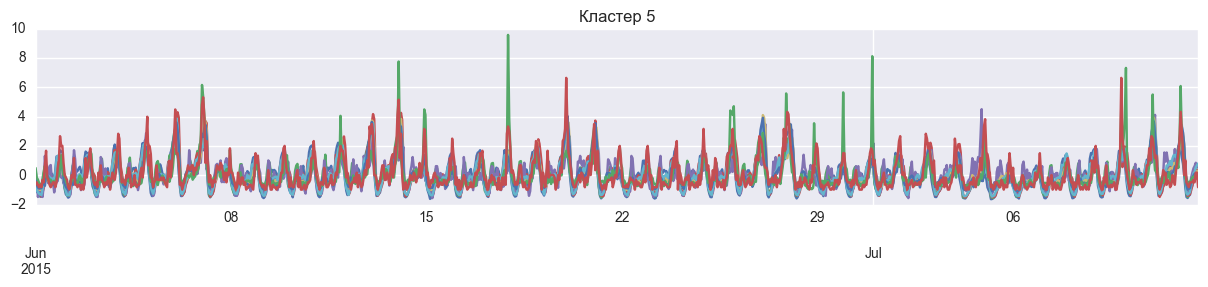

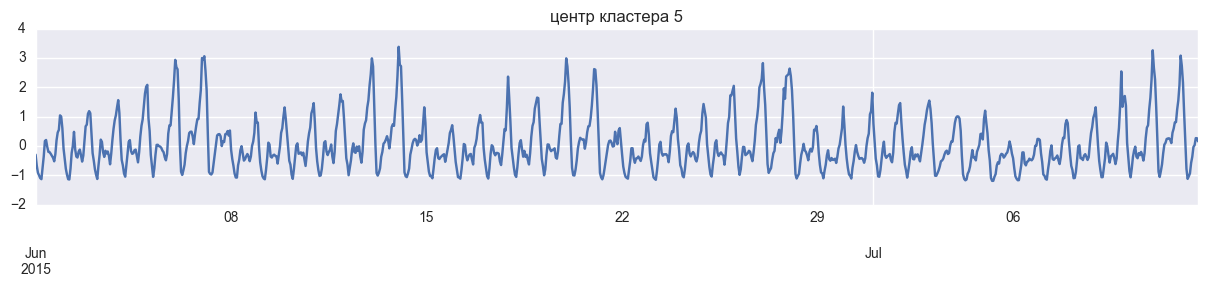

In [128]:
plt.figure(figsize(15,5))
ax = plt.subplot(211)
data[data.columns[np.argwhere(clust==4)[:,0]]][:1000].plot(ax=ax,legend=False)
plt.title(u'Кластер 5')
plt.show()
ax = plt.subplot(212)
data['cl5'][:1000].plot(ax=ax,legend=False)
plt.title(u'центр кластера 5')
plt.show()

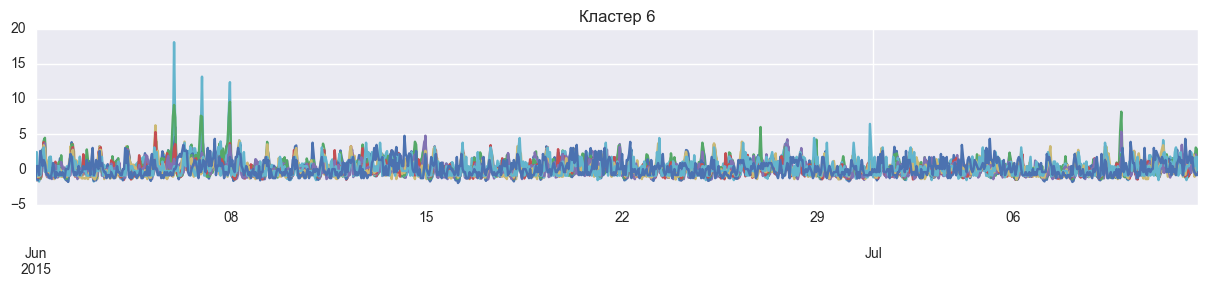

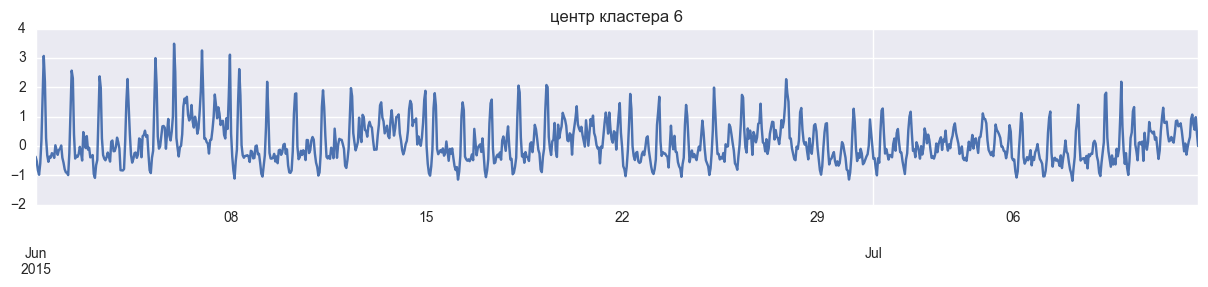

In [129]:
plt.figure(figsize(15,5))
ax = plt.subplot(211)
data[data.columns[np.argwhere(clust==5)[:,0]]][:1000].plot(ax=ax,legend=False)
plt.title(u'Кластер 6')
plt.show()
ax = plt.subplot(212)
data['cl6'][:1000].plot(ax=ax,legend=False)
plt.title(u'центр кластера 6')
plt.show()

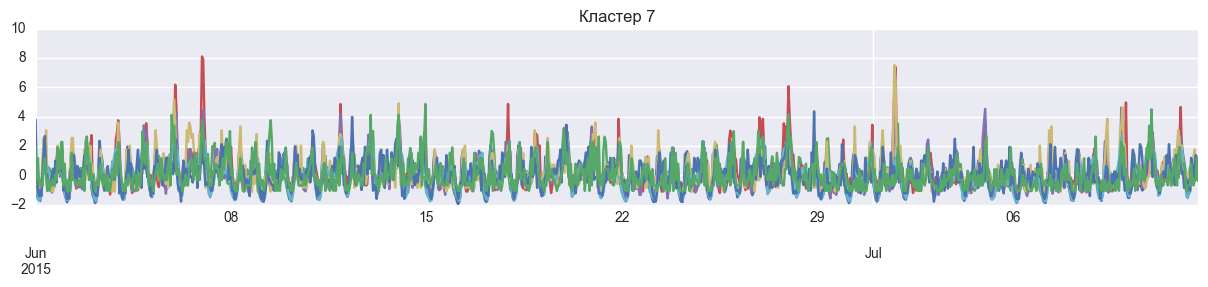

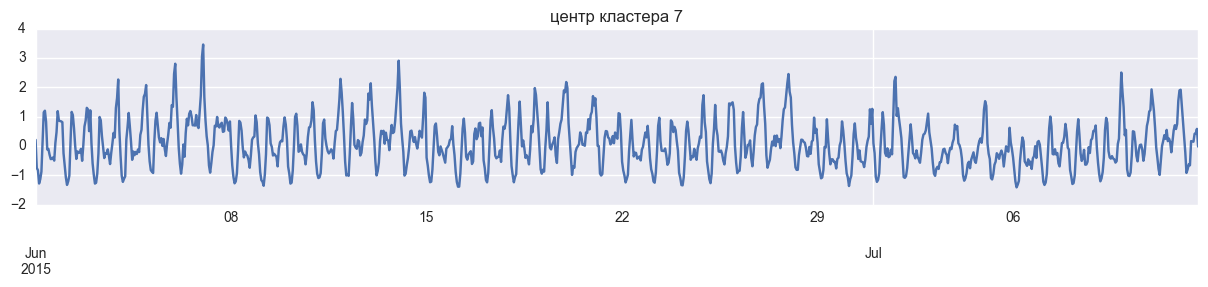

In [130]:
plt.figure(figsize(15,5))
ax = plt.subplot(211)
data[data.columns[np.argwhere(clust==6)[:,0]]][:1000].plot(ax=ax,legend=False)
plt.title(u'Кластер 7')
plt.show()
ax = plt.subplot(212)
data['cl7'][:1000].plot(ax=ax,legend=False)
plt.title(u'центр кластера 7')
plt.show()

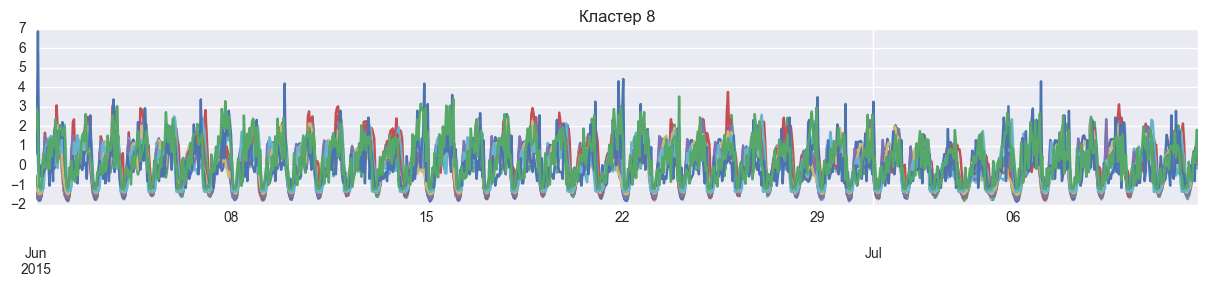

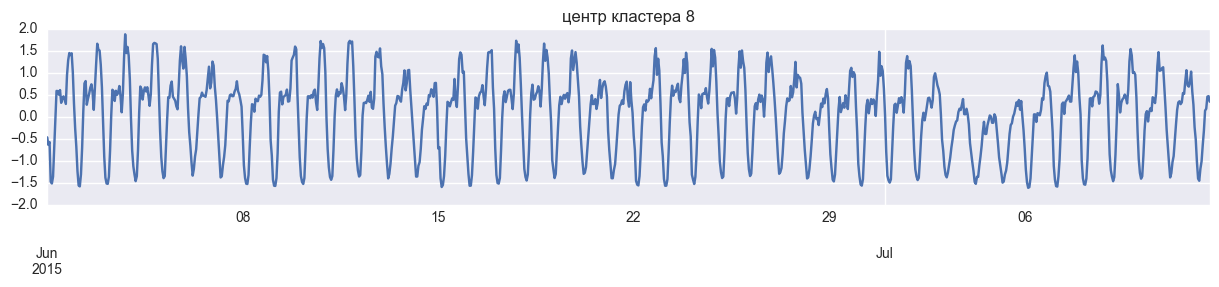

In [131]:
plt.figure(figsize(15,5))
ax = plt.subplot(211)
data[data.columns[np.argwhere(clust==7)[:,0]]][:1000].plot(ax=ax,legend=False)
plt.title(u'Кластер 8')
plt.show()
ax = plt.subplot(212)
data['cl8'][:1000].plot(ax=ax,legend=False)
plt.title(u'центр кластера 8')
plt.show()

In [1000]:
data.to_pickle('true_taxi_data.pkl')

In [986]:
data.index=pd.to_datetime(data.index)

Добавим регрессионных признаков

In [987]:
def s(x,i=1):
    return sin(x*2*pi*i/168)
def c(x,i=1):
    return cos(x*2*pi*i/168)

Добавим 35 sin и cos

In [988]:
leght=np.arange(len(data))
for i in range(1,36):
    data['s{}'.format(i)]=s(leght,i=i)
    data['c{}'.format(i)]=c(leght,i=i)

Добавим метку дня недели

In [989]:
data['week']=data.index.weekday

Добавим метку 1ого января

In [990]:
data['new_year']=[1 if date.day==1 and date.month==1 else 0 for date in data.index]

In [991]:
data.head()

1075  1076  1077  1125  1126  1127  1128  1129  1130  \
2015-06-01 00:00:00    40    32     7    17    60   129   153   271   294   
2015-06-01 01:00:00    17    20     5    13    38    90   111   163   246   
2015-06-01 02:00:00     5     5     0     8    25    47    97   139   207   
2015-06-01 03:00:00     5     6     0     6    27    26    68    77   208   
2015-06-01 04:00:00     8    16     2     6    21    39    53    81   109   

                     1131    ...          s32       c32       s33       c33  \
2015-06-01 00:00:00    70    ...     0.000000  1.000000  0.000000  1.000000   
2015-06-01 01:00:00    28    ...     0.930874  0.365341  0.943883  0.330279   
2015-06-01 02:00:00    25    ...     0.680173 -0.733052  0.623490 -0.781831   
2015-06-01 03:00:00    29    ...    -0.433884 -0.900969 -0.532032 -0.846724   
2015-06-01 04:00:00     8    ...    -0.997204  0.074730 -0.974928  0.222521   

                          s34       c34       s35       c35  week  new_year  
2015-06-01 00:00:00  0.000000  1.000000  0.000000  1.000000     0         0  
2015-06-01 01:00:00  0.955573  0.294755  0.965926  0.258819     0         0  
2015-06-01 02:00:00  0.563320 -0.826239  0.500000 -0.866025     0         0  
2015-06-01 03:00:00 -0.623490 -0.781831 -0.707107 -0.707107     0         0  
2015-06-01 04:00:00 -0.930874  0.365341 -0.866025  0.500000     0         0  

[5 rows x 174 columns]

Обучим логистическую регрессию

In [187]:
'+'.join(data.columns[-72:])

's1+c1+s2+c2+s3+c3+s4+c4+s5+c5+s6+c6+s7+c7+s8+c8+s9+c9+s10+c10+s11+c11+s12+c12+s13+c13+s14+c14+s15+c15+s16+c16+s17+c17+s18+c18+s19+c19+s20+c20+s21+c21+s22+c22+s23+c23+s24+c24+s25+c25+s26+c26+s27+c27+s28+c28+s29+c29+s30+c30+s31+c31+s32+c32+s33+c33+s34+c34+s35+c35+week+new_year'

In [188]:
reg = smf.ols('cl1 ~'+'+'.join(data.columns[-72:]), data=data)
fitted = reg.fit()
print fitted.summary()

                            OLS Regression Results                            
Dep. Variable:                    cl1   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     31.26
Date:                Wed, 22 Feb 2017   Prob (F-statistic):               0.00
Time:                        11:53:58   Log-Likelihood:                -1256.1
No. Observations:                8040   AIC:                             2658.
Df Residuals:                    7967   BIC:                             3169.
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0125      0.042     -0.296      0.7

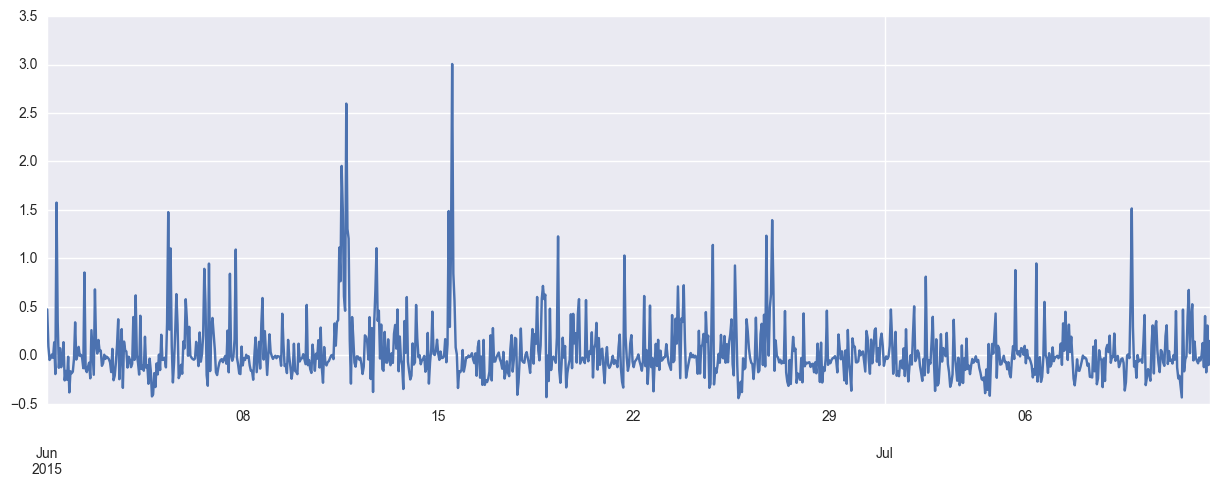

In [191]:
fitted.resid[:1000].plot()

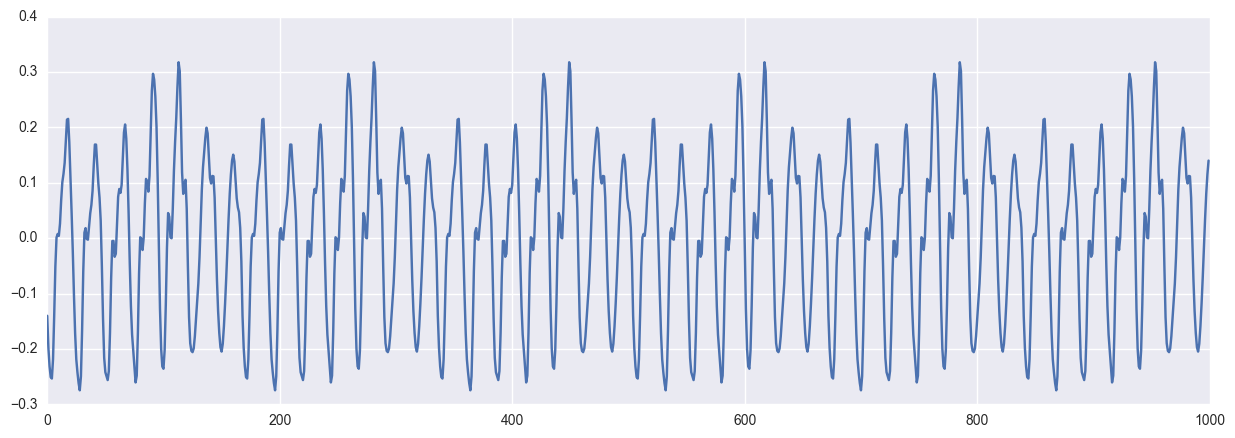

In [198]:
plt.plot(fitted.predict()[:1000])

Критерий Дики-Фуллера: p=0.000000


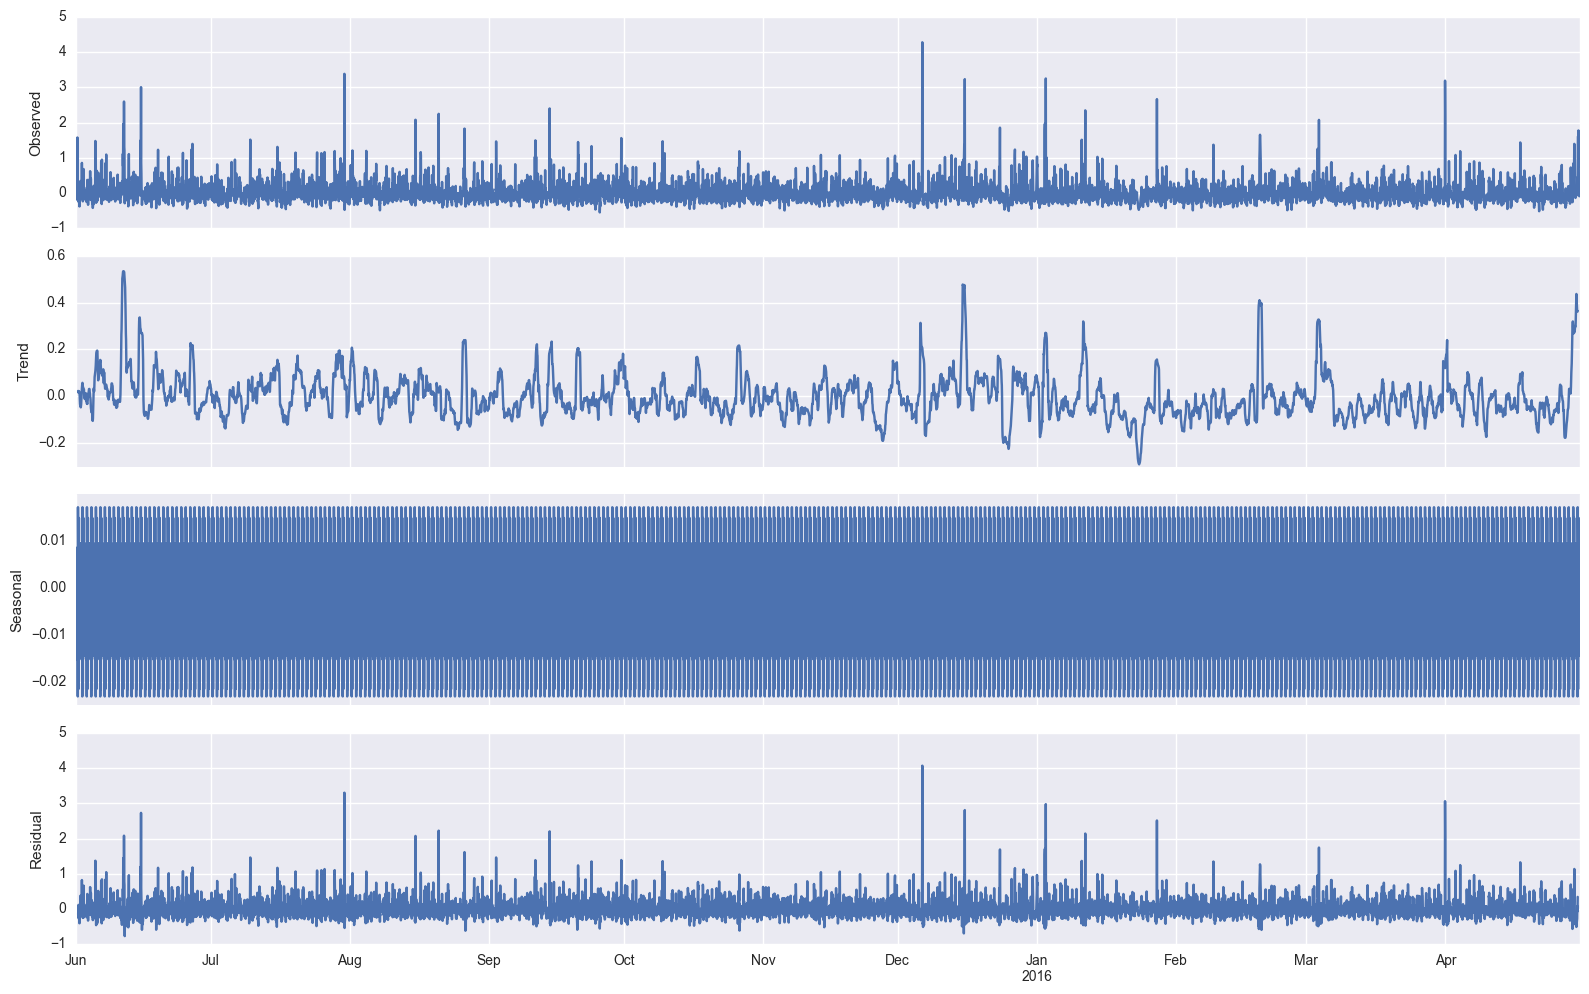

In [199]:
plt.figure(figsize(16,10))
sm.tsa.seasonal_decompose(fitted.resid).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(fitted.resid)[1])

Можно утверждать, что остатки стационарны

In [200]:
resid = pd.DataFrame(fitted.resid, columns = ['val'], index=data.index)

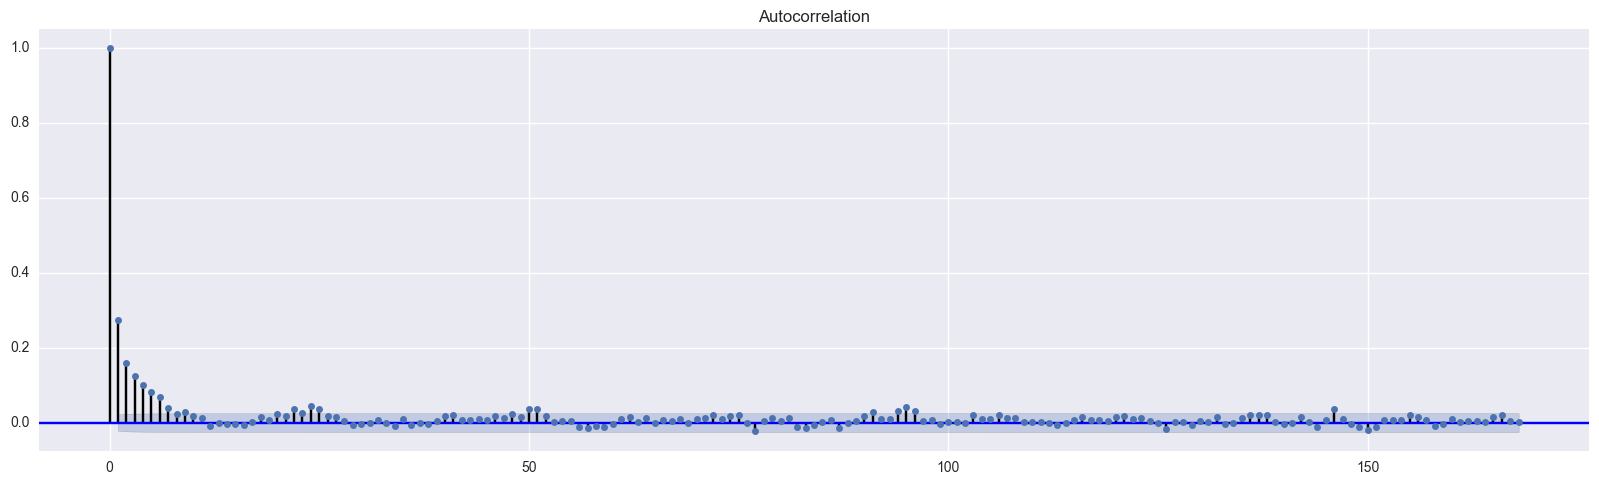

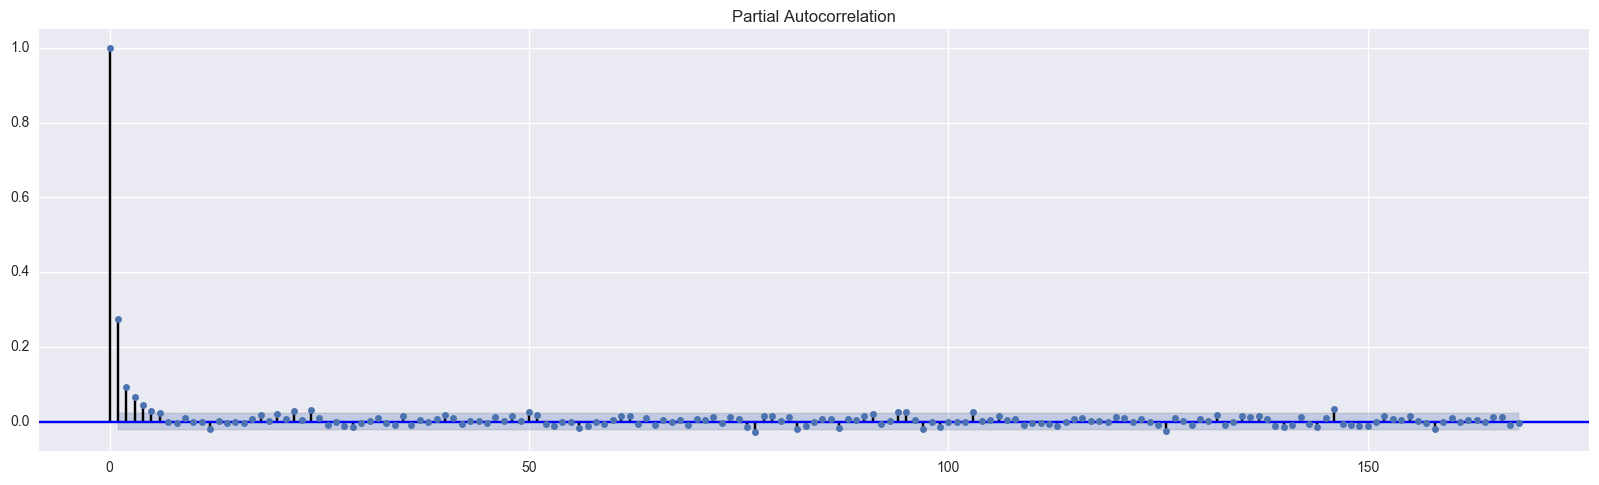

In [207]:
plt.figure(figsize(20,12))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=168, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(resid.values.squeeze(), lags=168, ax=ax)
pylab.show()

Начальные приближения: Q=1, q=7, P=1, p=5

In [230]:
ps = range(0, 4)
d=1
qs = range(0, 6)
Ps = range(0, 1)
D=1
Qs = range(0, 1)

In [231]:
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

24

In [240]:
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    print(param)
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(data['cl1'],
                                        exog=data[data.columns[-72:]].values ,order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 24)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

(0, 0, 0, 0)
('wrong parameters:', (0, 0, 0, 0))
(0, 1, 0, 0)
(0, 2, 0, 0)
(0, 3, 0, 0)
(0, 4, 0, 0)
(0, 5, 0, 0)
(1, 0, 0, 0)
(1, 1, 0, 0)
(1, 2, 0, 0)
(1, 3, 0, 0)
('wrong parameters:', (1, 3, 0, 0))
(1, 4, 0, 0)
(1, 5, 0, 0)
(2, 0, 0, 0)
(2, 1, 0, 0)
(2, 2, 0, 0)
(2, 3, 0, 0)
(2, 4, 0, 0)
(2, 5, 0, 0)
('wrong parameters:', (2, 5, 0, 0))
(3, 0, 0, 0)
(3, 1, 0, 0)
(3, 2, 0, 0)
(3, 3, 0, 0)
(3, 4, 0, 0)
(3, 5, 0, 0)


In [241]:
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                cl1   No. Observations:                 8040
Model:             SARIMAX(2, 1, 0)x(0, 1, 0, 24)   Log Likelihood               -5427.339
Date:                            Fri, 24 Feb 2017   AIC                          11004.677
Time:                                    19:59:11   BIC                          11529.091
Sample:                                06-01-2015   HQIC                         11184.131
                                     - 04-30-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0115      0.299     -0.038      0.969      -0.597       0.574
x2            -0.0188      0.322   

In [243]:
params={}
params[1]=[2,0,0,0]
params[2]=[2,0,0,0]

Теперь подберем параметры для остальных кластеров. Чтобы сократить время подбора сократим число кластеров, исходя из характерной формы рядов кластеров. Параметры будут одинаковы для кластеров (1,2), (3,5), (4,8), (6,7).

In [242]:
clust

array([3, 3, 3, 7, 7, 4, 4, 4, 7, 3, 0, 1, 5, 5, 4, 4, 4, 7, 7, 3, 6, 6, 3,
       0, 2, 6, 6, 6, 0, 4, 6, 7, 7, 7, 7, 3, 3, 3, 4, 4, 0, 3, 3, 7, 7, 3,
       3, 3, 3, 3, 0, 2, 2, 3, 3, 3, 3, 3, 3, 3, 6, 0, 2, 2, 2, 2, 3, 3, 3,
       3, 5, 5, 1, 1, 1, 2, 5, 5, 5, 5, 5, 5, 1, 1, 6, 2, 5, 5, 2, 2, 2, 2,
       5, 0, 7, 0, 0, 7, 0, 7, 0, 0])

In [244]:
reg2 = smf.ols('cl3 ~'+'+'.join(data.columns[-72:]), data=data)
fitted = reg.fit()
print fitted.summary()

                            OLS Regression Results                            
Dep. Variable:                    cl1   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     31.26
Date:                Fri, 24 Feb 2017   Prob (F-statistic):               0.00
Time:                        20:27:56   Log-Likelihood:                -1256.1
No. Observations:                8040   AIC:                             2658.
Df Residuals:                    7967   BIC:                             3169.
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0125      0.042     -0.296      0.7

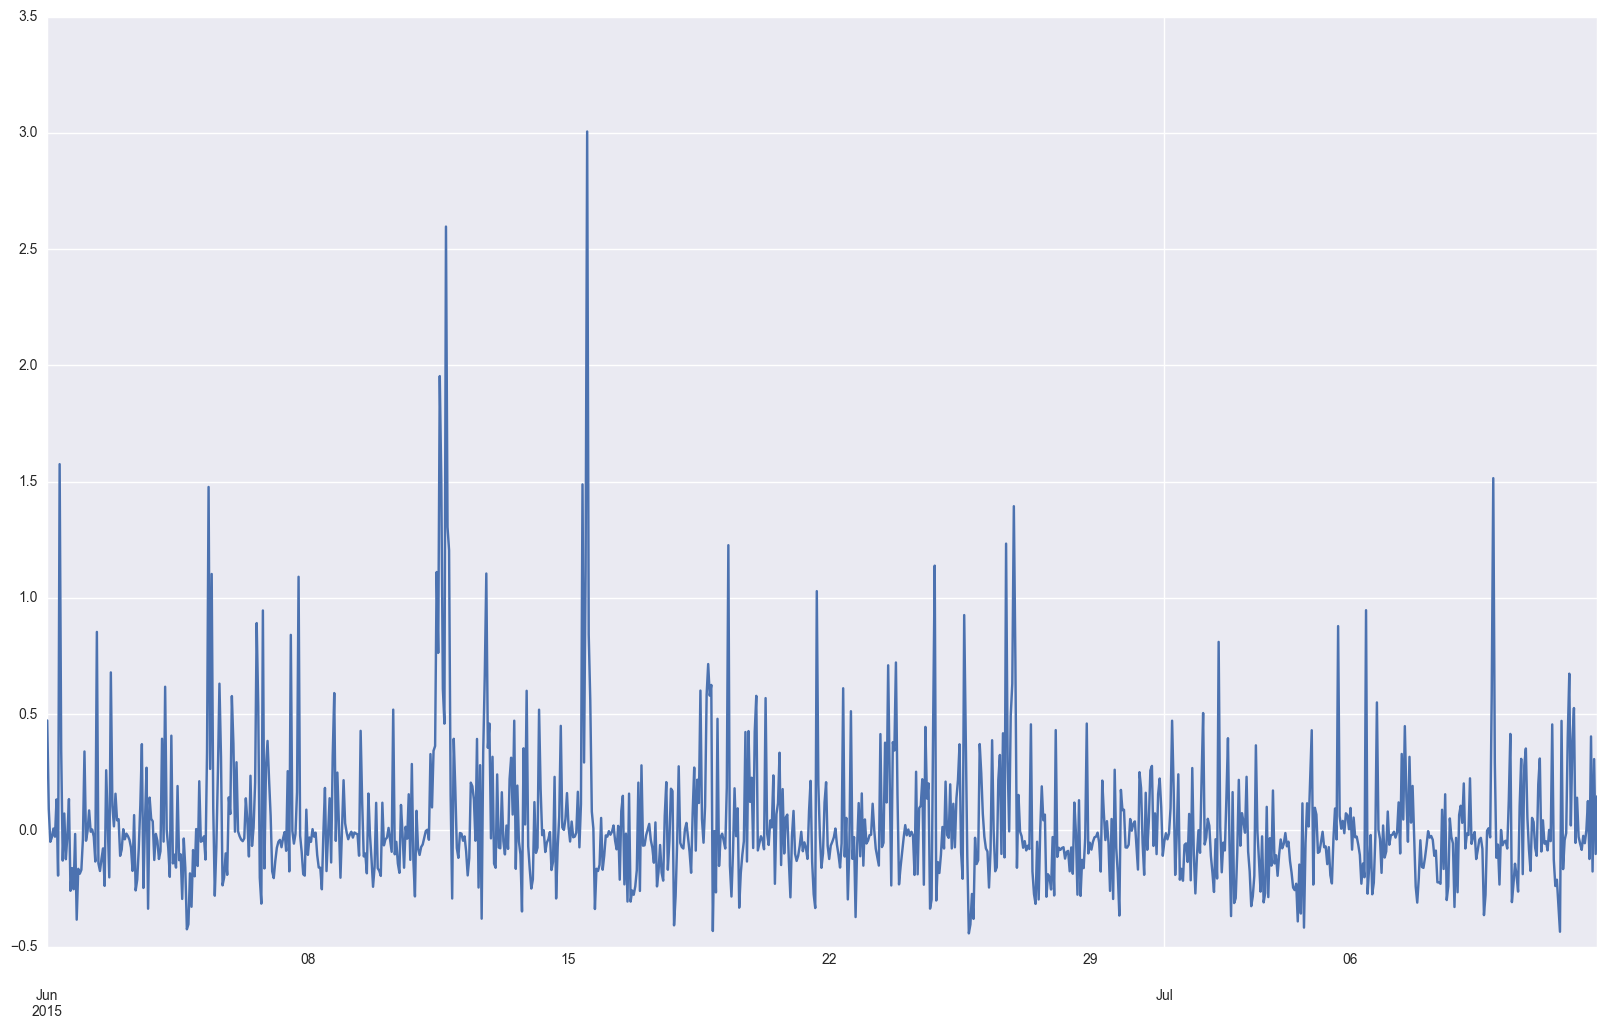

In [245]:
fitted.resid[:1000].plot()

Критерий Дики-Фуллера: p=0.000000


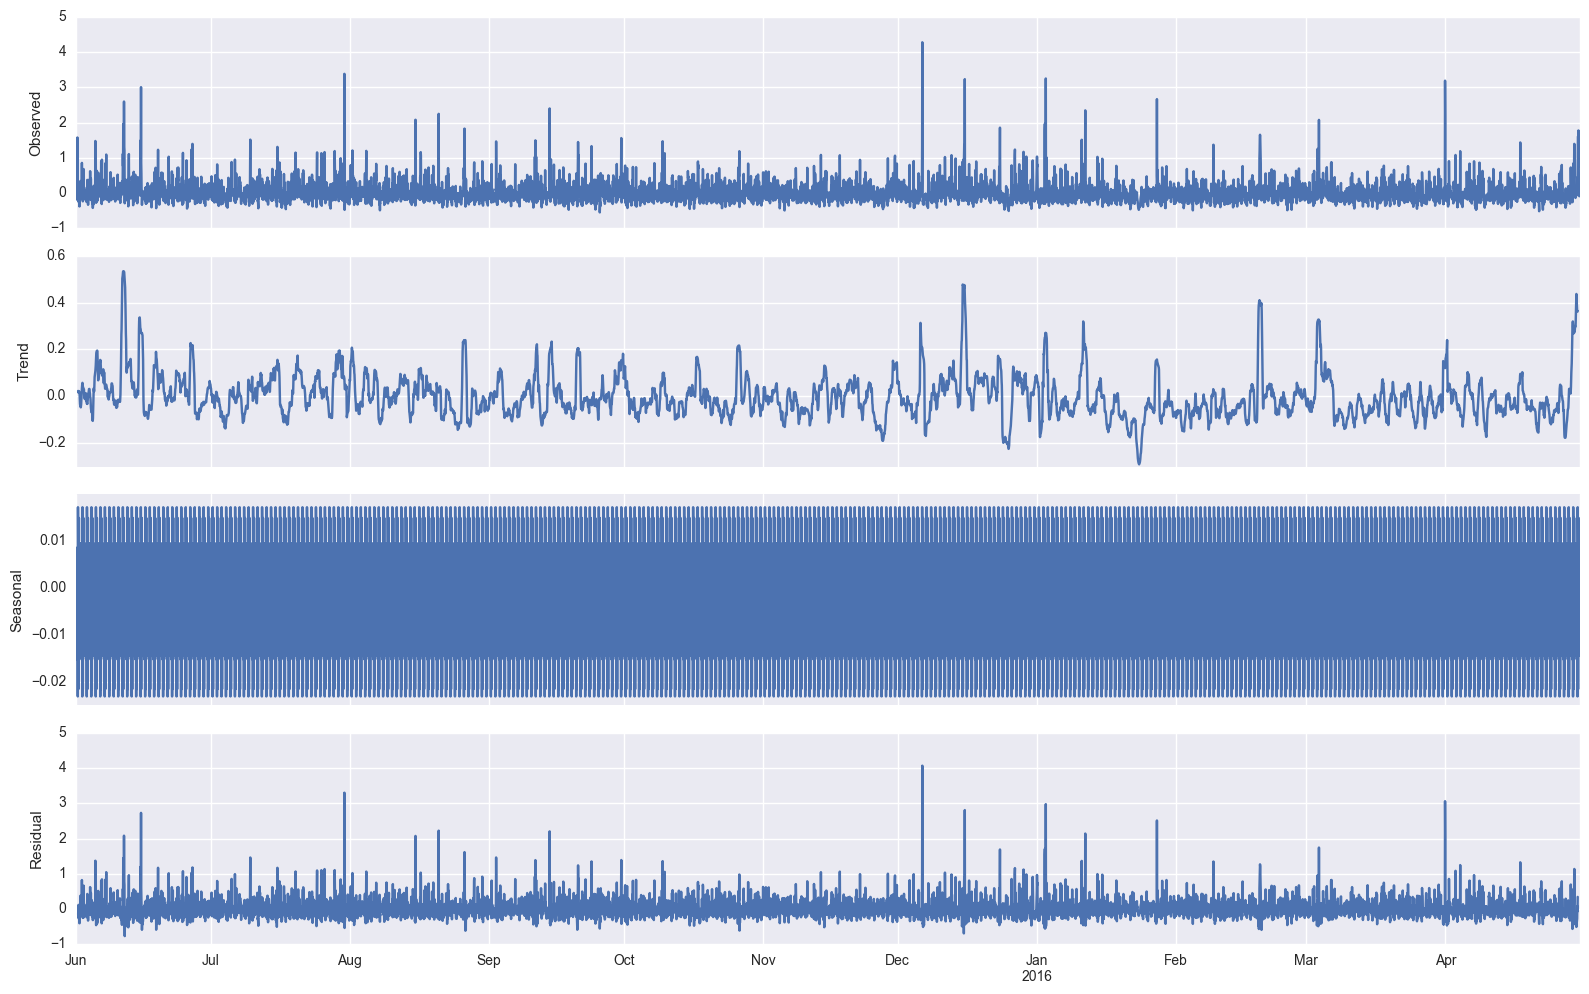

In [246]:
plt.figure(figsize(16,10))
sm.tsa.seasonal_decompose(fitted.resid).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(fitted.resid)[1])

In [247]:
resid = pd.DataFrame(fitted.resid, columns = ['val'], index=data.index)

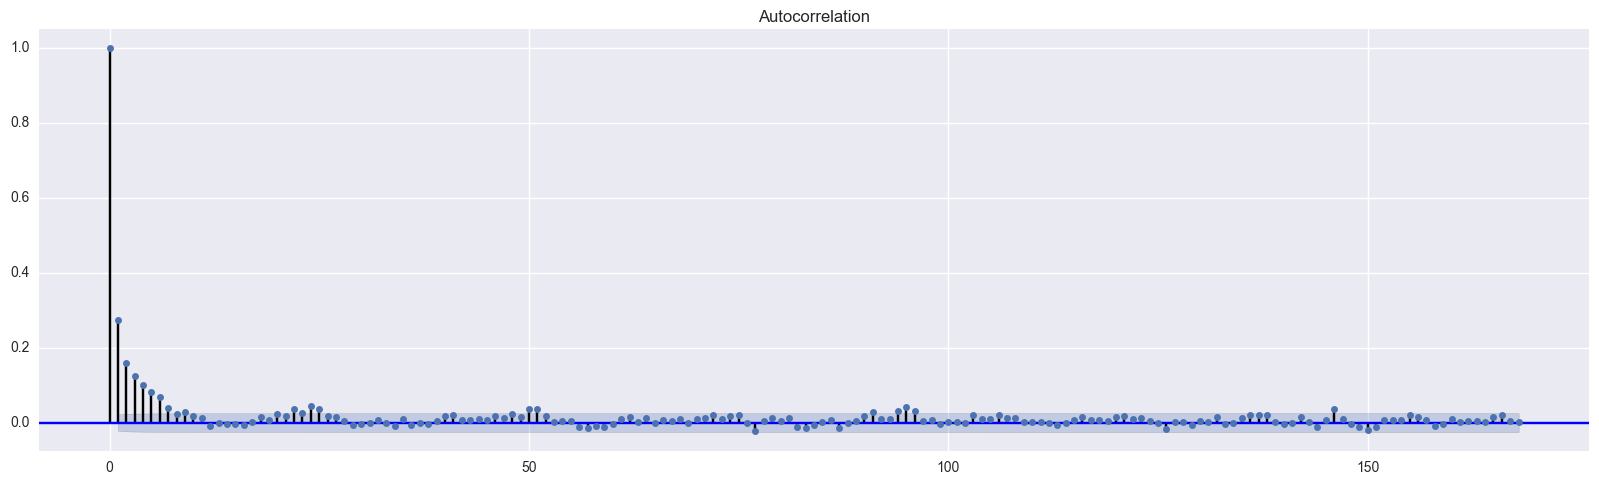

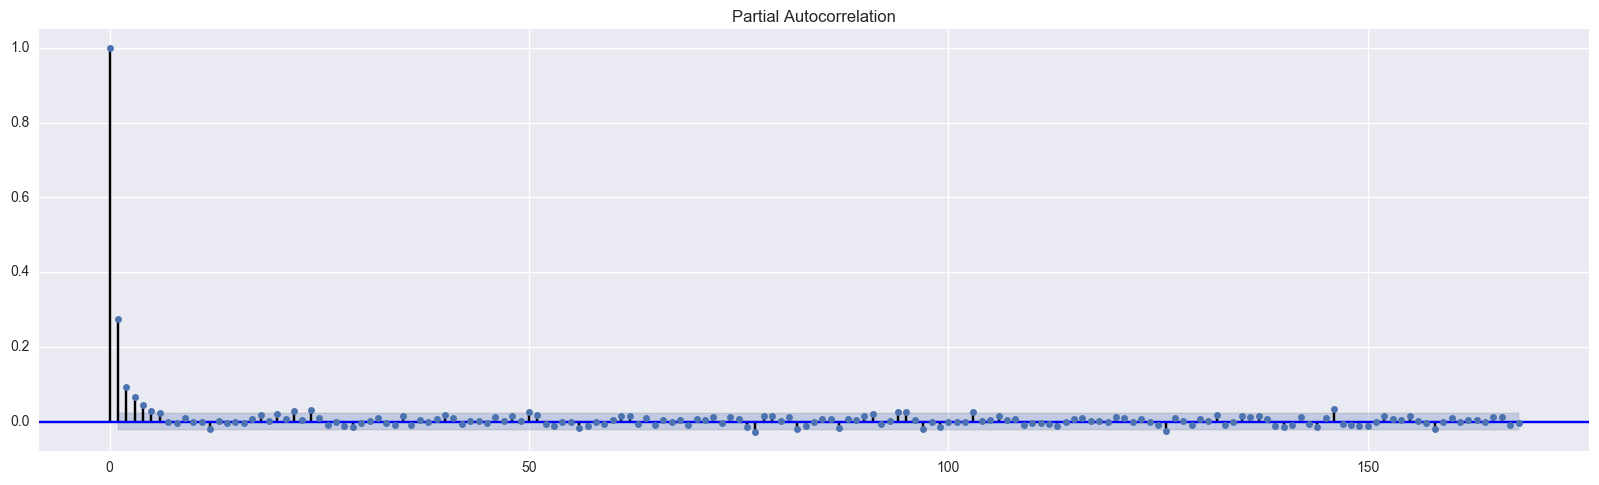

In [248]:
plt.figure(figsize(20,12))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=168, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(resid.values.squeeze(), lags=168, ax=ax)
pylab.show()

In [256]:
ps = range(0, 4)
d=1
qs = range(0, 4)
Ps = range(0, 1)
D=1
Qs = range(0, 1)

In [257]:
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

16

In [258]:
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    print(param)
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(data['cl3'],
                                        exog=data[data.columns[-72:]].values ,order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 24)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

(0, 0, 0, 0)
('wrong parameters:', (0, 0, 0, 0))
(0, 1, 0, 0)
(0, 2, 0, 0)
(0, 3, 0, 0)
(1, 0, 0, 0)
(1, 1, 0, 0)
(1, 2, 0, 0)
(1, 3, 0, 0)
(2, 0, 0, 0)
(2, 1, 0, 0)
(2, 2, 0, 0)
(2, 3, 0, 0)
(3, 0, 0, 0)
(3, 1, 0, 0)
(3, 2, 0, 0)
(3, 3, 0, 0)


In [259]:
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                cl3   No. Observations:                 8040
Model:             SARIMAX(1, 1, 2)x(0, 1, 0, 24)   Log Likelihood               -4986.813
Date:                            Sat, 25 Feb 2017   AIC                          10125.626
Time:                                    00:18:37   BIC                          10657.032
Sample:                                06-01-2015   HQIC                         10307.472
                                     - 04-30-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2878      0.305     -0.945      0.345      -0.885       0.309
x2             0.0820      0.313   

In [260]:
params[3]=[1,2,0,0]
params[5]=[1,2,0,0]

In [261]:
params

{1: [2, 0, 0, 0], 2: [2, 0, 0, 0], 3: [1, 2, 0, 0], 5: [1, 2, 0, 0]}

In [262]:
reg3 = smf.ols('cl4 ~'+'+'.join(data.columns[-72:]), data=data)
fitted = reg.fit()
print fitted.summary()

                            OLS Regression Results                            
Dep. Variable:                    cl1   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     31.26
Date:                Sat, 25 Feb 2017   Prob (F-statistic):               0.00
Time:                        00:20:23   Log-Likelihood:                -1256.1
No. Observations:                8040   AIC:                             2658.
Df Residuals:                    7967   BIC:                             3169.
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0125      0.042     -0.296      0.7

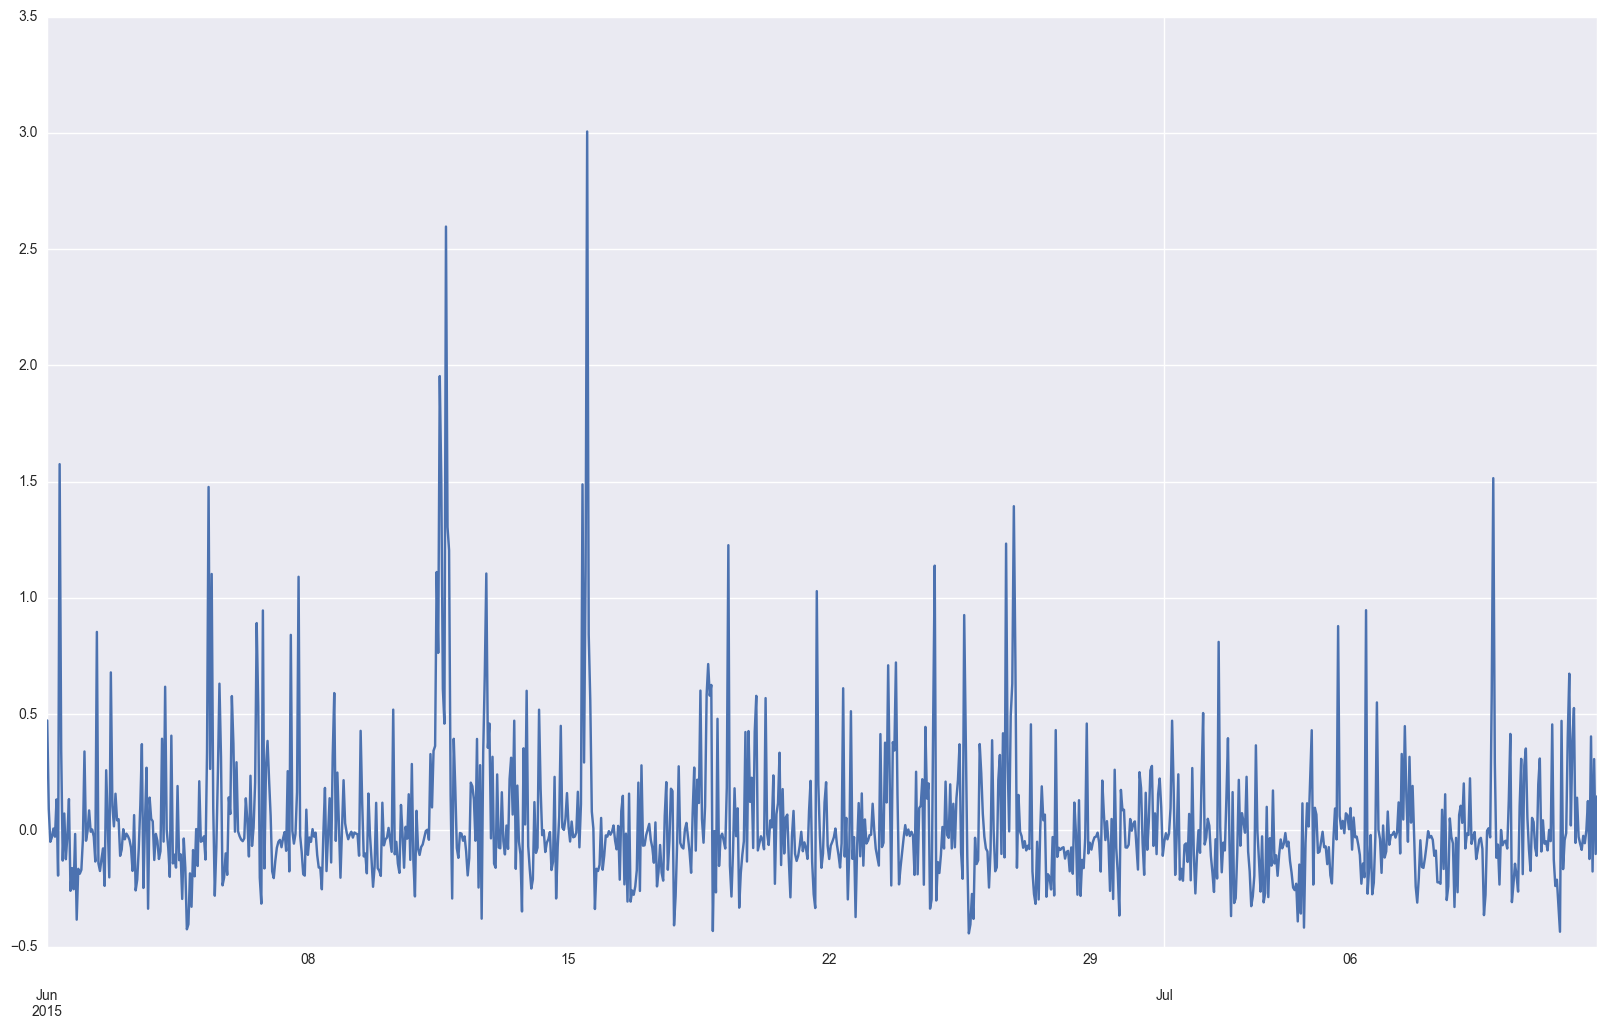

In [263]:
fitted.resid[:1000].plot()

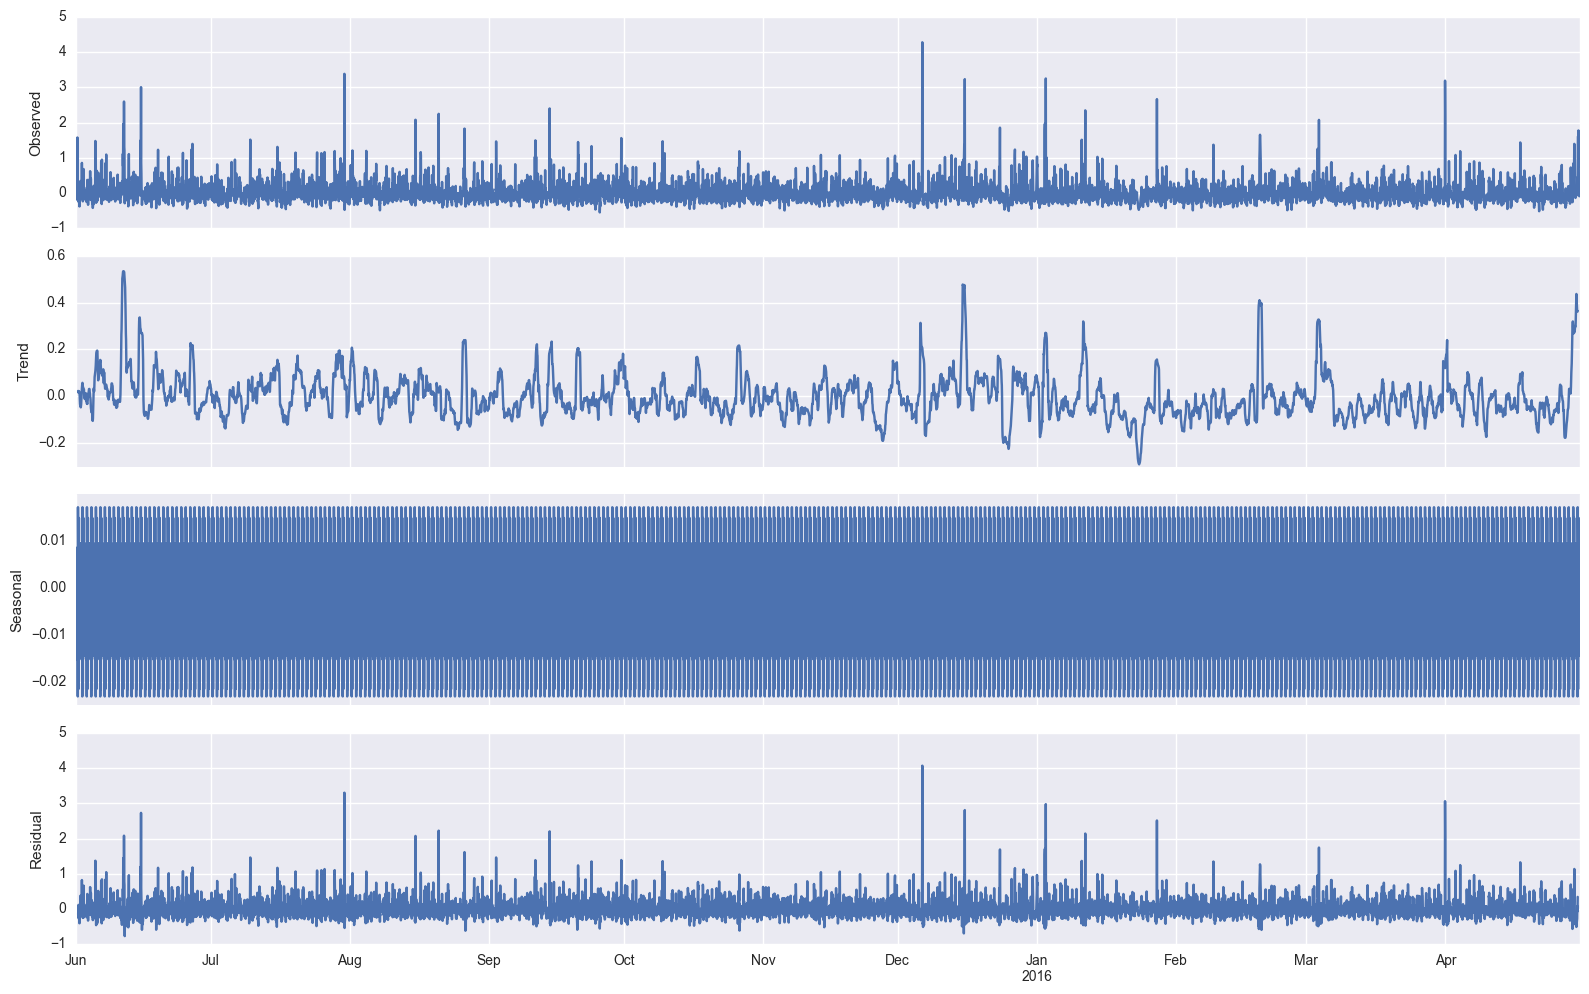

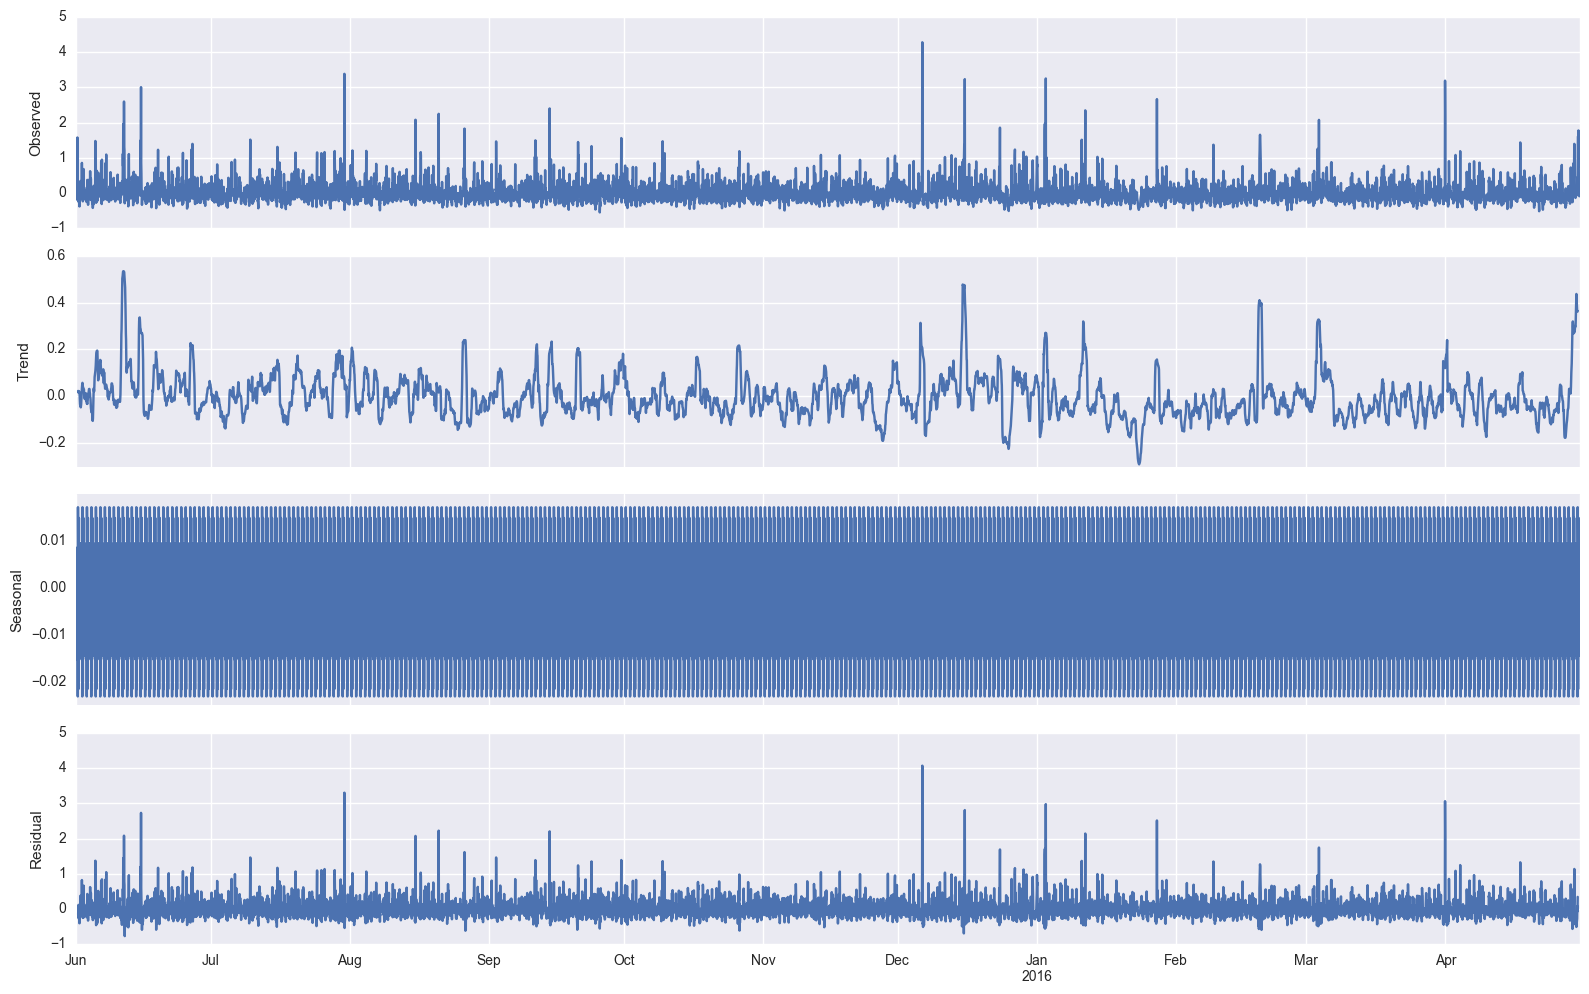

In [264]:
plt.figure(figsize(16,10))
sm.tsa.seasonal_decompose(fitted.resid).plot()

In [265]:
resid = pd.DataFrame(fitted.resid, columns = ['val'], index=data.index)

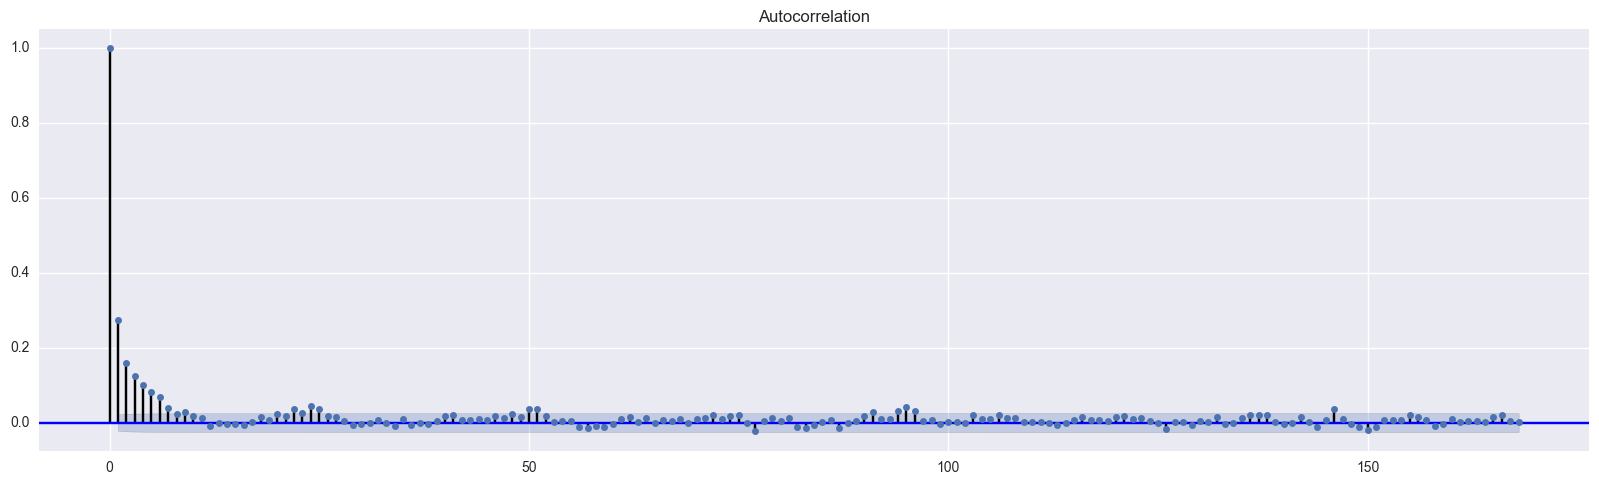

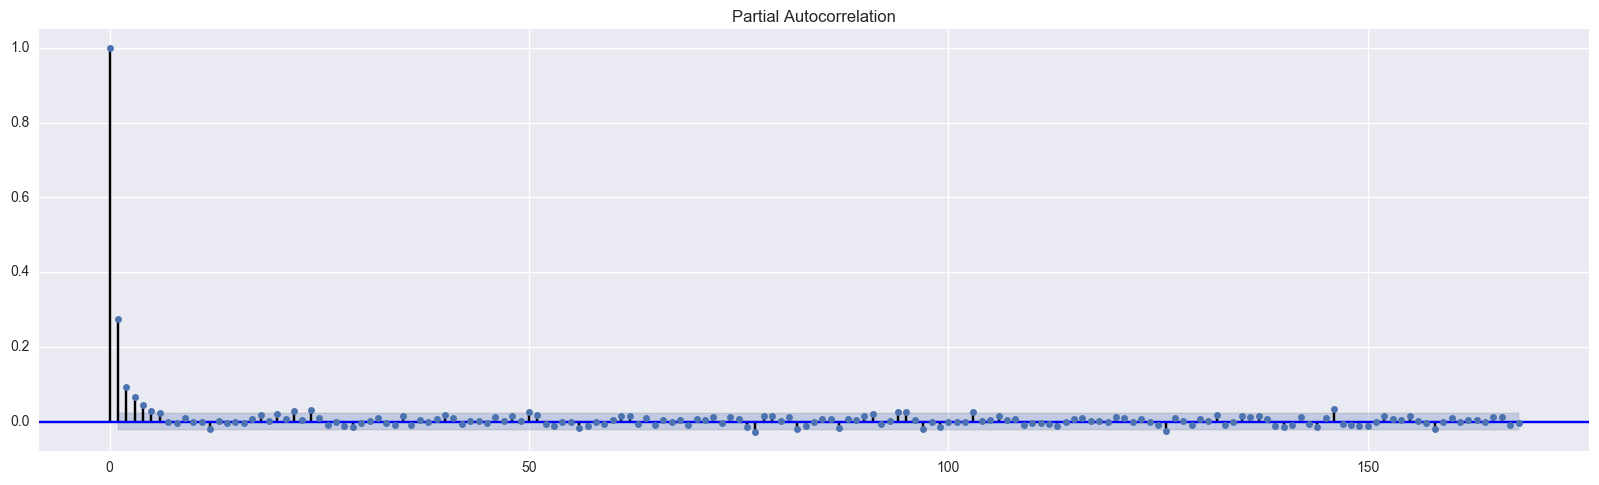

In [266]:
plt.figure(figsize(20,12))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=168, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(resid.values.squeeze(), lags=168, ax=ax)
pylab.show()

In [267]:
ps = range(0, 3)
d=1
qs = range(0, 6)
Ps = range(0, 1)
D=1
Qs = range(0, 1)

In [268]:
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

18

In [280]:
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    print(param)
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(data['cl4'],
                                        exog=data[data.columns[-72:]].values ,order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 24)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

(0, 0, 0, 0)
('wrong parameters:', (0, 0, 0, 0))
(0, 1, 0, 0)
(0, 2, 0, 0)
(0, 3, 0, 0)
(0, 4, 0, 0)
(0, 5, 0, 0)
(1, 0, 0, 0)
(1, 1, 0, 0)
(1, 2, 0, 0)
(1, 3, 0, 0)
(1, 4, 0, 0)
(1, 5, 0, 0)
(2, 0, 0, 0)
(2, 1, 0, 0)
(2, 2, 0, 0)
(2, 3, 0, 0)
(2, 4, 0, 0)
(2, 5, 0, 0)


In [281]:
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                cl4   No. Observations:                 8040
Model:             SARIMAX(1, 1, 1)x(0, 1, 0, 24)   Log Likelihood                2200.713
Date:                            Sat, 25 Feb 2017   AIC                          -4251.427
Time:                                    22:16:43   BIC                          -3727.013
Sample:                                06-01-2015   HQIC                         -4071.973
                                     - 04-30-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0303      0.125     -0.243      0.808      -0.275       0.214
x2            -0.1175      0.133   

In [282]:
params[4]=[1,1,0,0]
params[8]=[1,1,0,0]

In [272]:
reg3 = smf.ols('cl6 ~'+'+'.join(data.columns[-72:]), data=data)
fitted = reg.fit()
print fitted.summary()

                            OLS Regression Results                            
Dep. Variable:                    cl1   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     31.26
Date:                Sat, 25 Feb 2017   Prob (F-statistic):               0.00
Time:                        11:30:12   Log-Likelihood:                -1256.1
No. Observations:                8040   AIC:                             2658.
Df Residuals:                    7967   BIC:                             3169.
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0125      0.042     -0.296      0.7

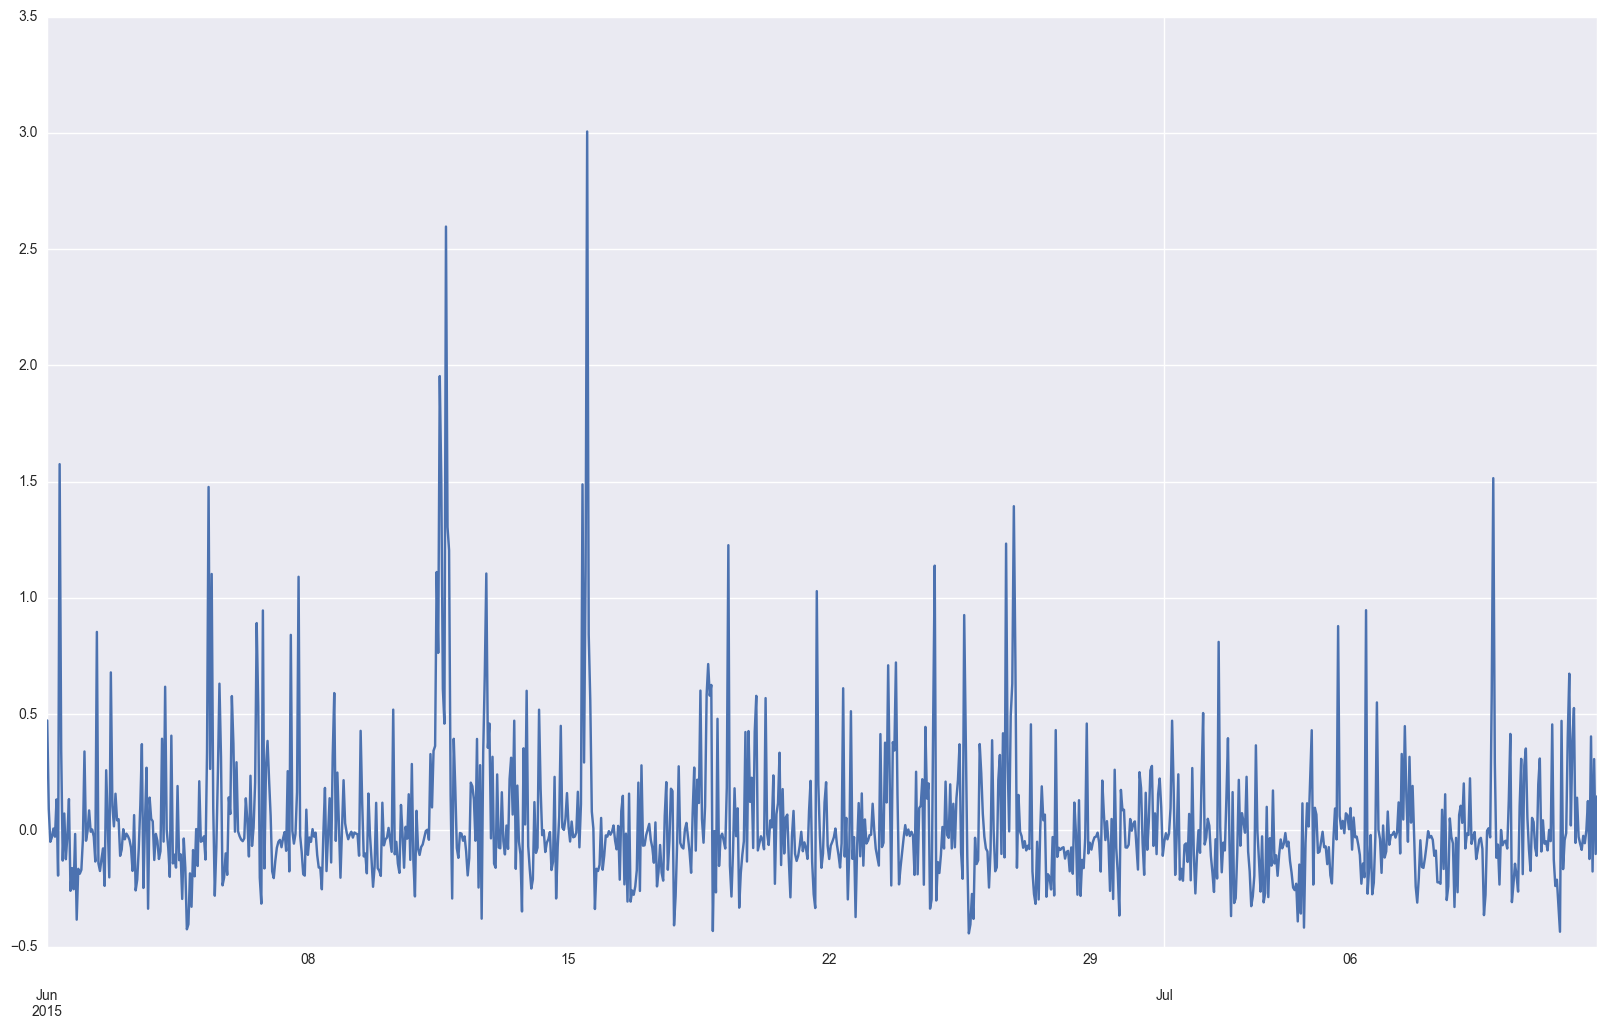

In [273]:
fitted.resid[:1000].plot()

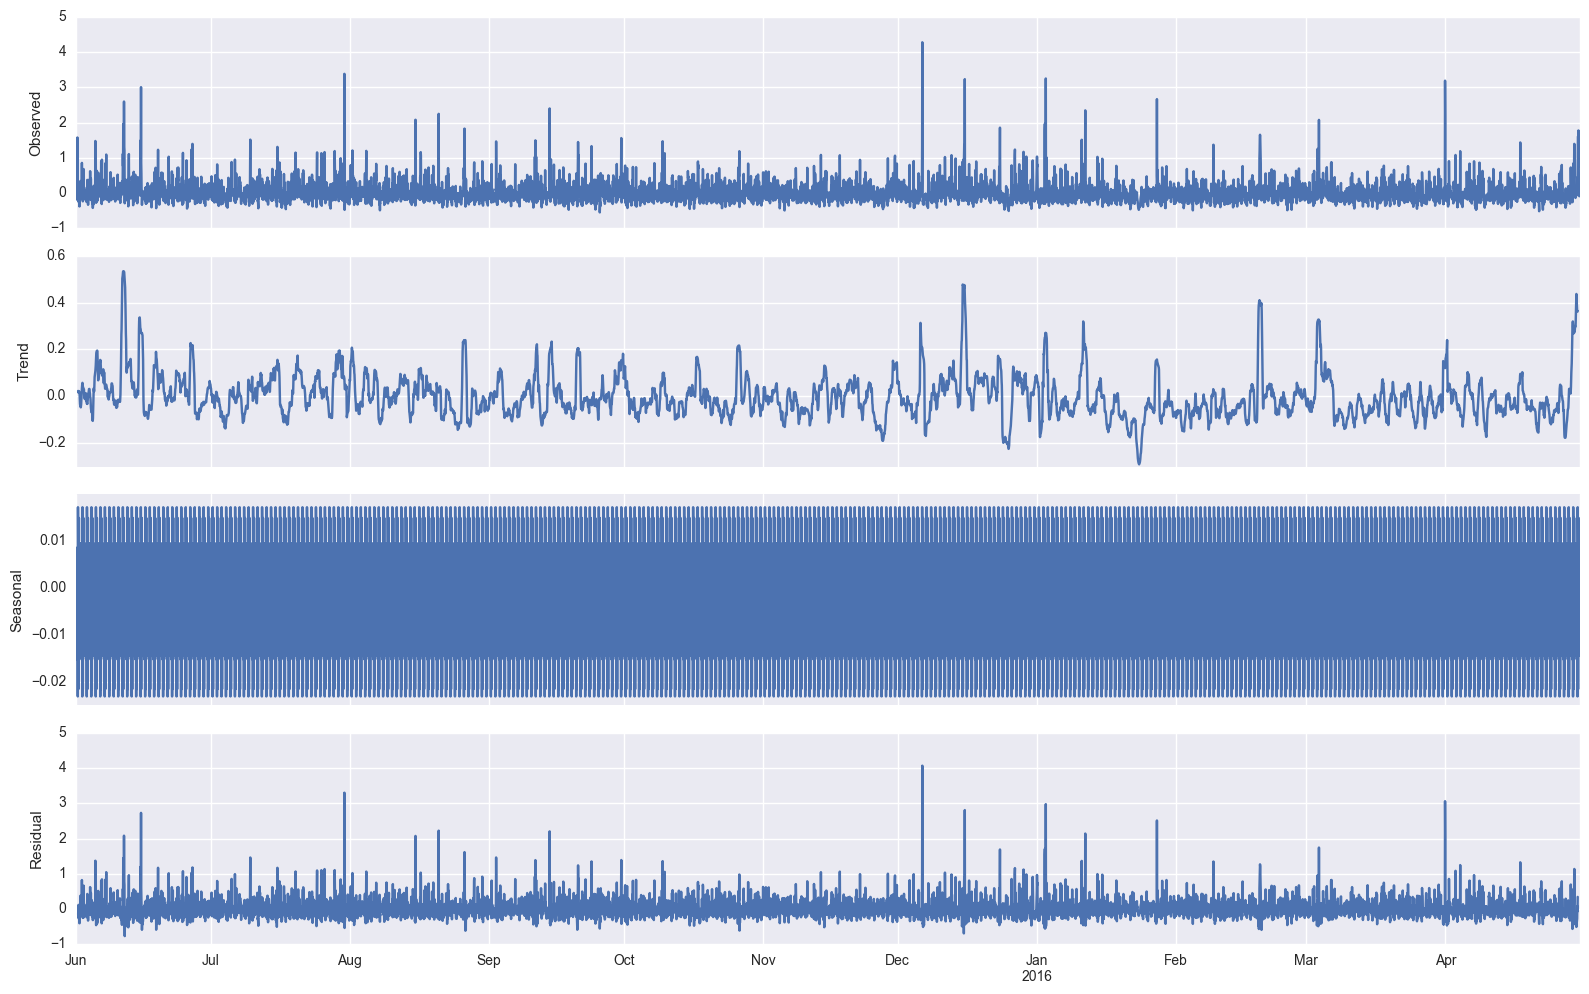

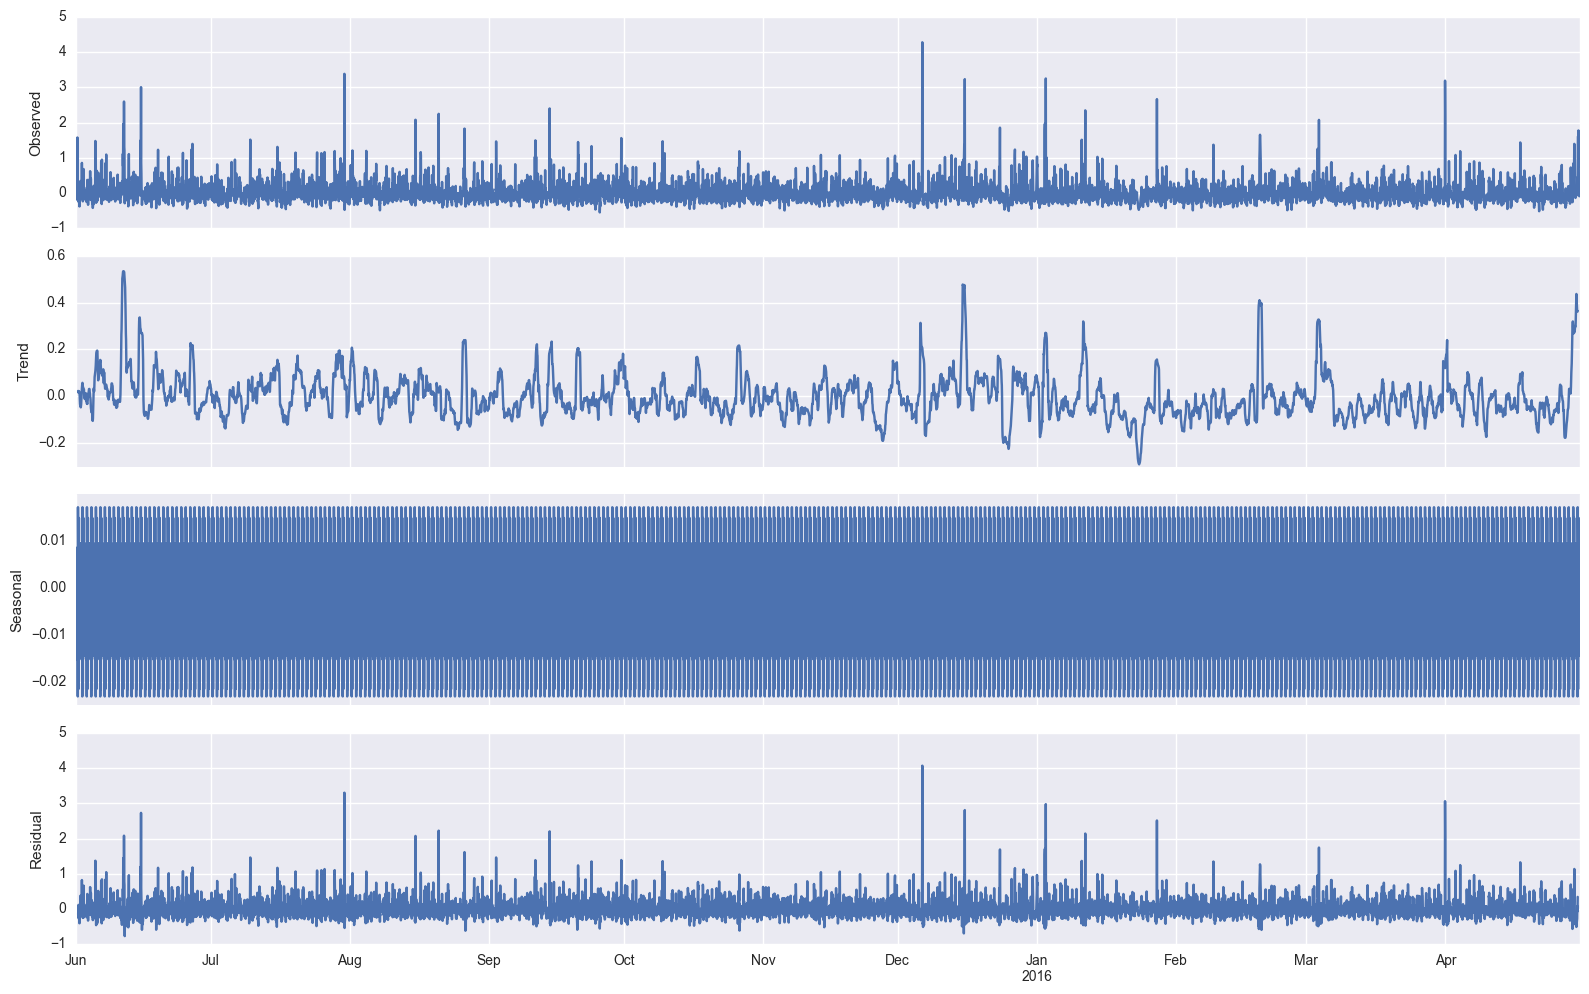

In [274]:
plt.figure(figsize(16,10))
sm.tsa.seasonal_decompose(fitted.resid).plot()

In [275]:
resid = pd.DataFrame(fitted.resid, columns = ['val'], index=data.index)

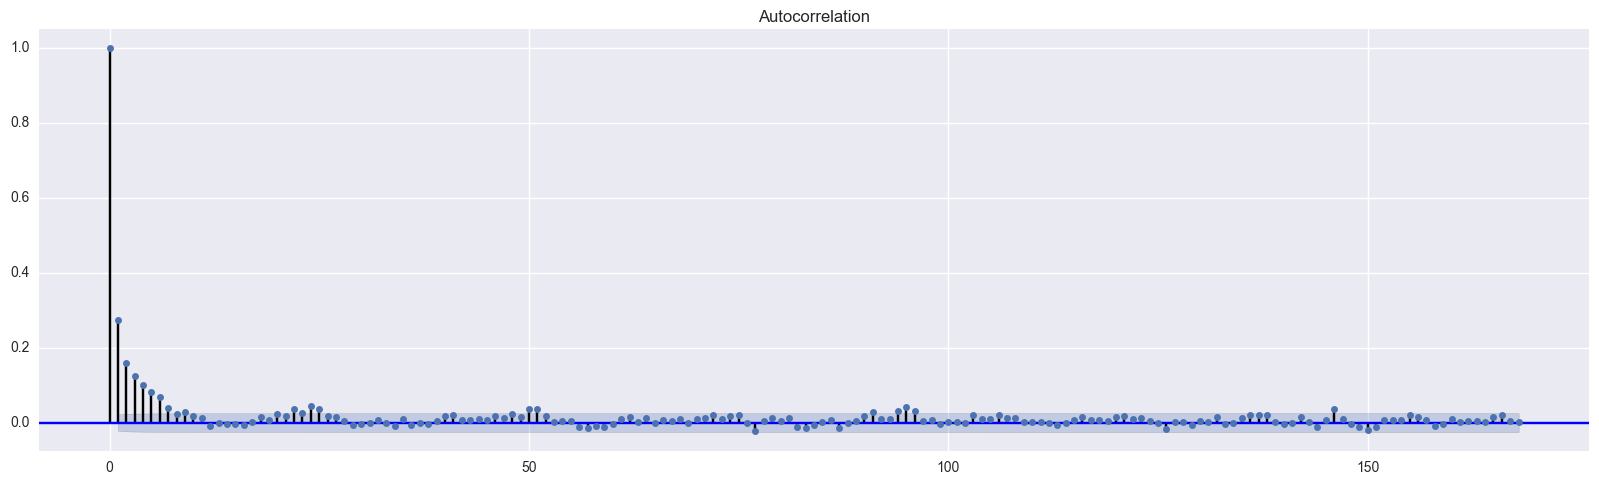

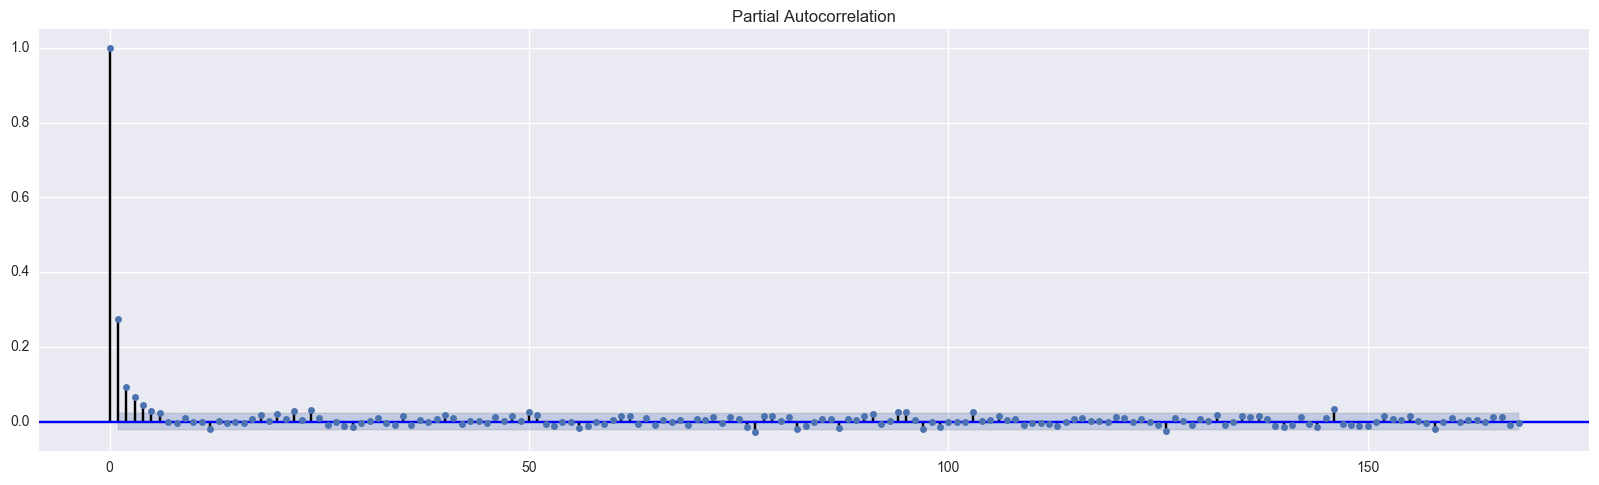

In [276]:
plt.figure(figsize(20,12))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=168, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(resid.values.squeeze(), lags=168, ax=ax)
pylab.show()

In [277]:
ps = range(0, 3)
d=1
qs = range(0, 6)
Ps = range(0, 1)
D=1
Qs = range(0, 1)

In [278]:
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

18

In [283]:
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    print(param)
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(data['cl6'],
                                        exog=data[data.columns[-72:]].values ,order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 24)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

(0, 0, 0, 0)
('wrong parameters:', (0, 0, 0, 0))
(0, 1, 0, 0)
(0, 2, 0, 0)
(0, 3, 0, 0)
(0, 4, 0, 0)
(0, 5, 0, 0)
(1, 0, 0, 0)
(1, 1, 0, 0)
(1, 2, 0, 0)
(1, 3, 0, 0)
(1, 4, 0, 0)
(1, 5, 0, 0)
(2, 0, 0, 0)
(2, 1, 0, 0)
(2, 2, 0, 0)
(2, 3, 0, 0)
(2, 4, 0, 0)
(2, 5, 0, 0)


In [284]:
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                cl6   No. Observations:                 8040
Model:             SARIMAX(1, 1, 1)x(0, 1, 0, 24)   Log Likelihood               -3861.737
Date:                            Sun, 26 Feb 2017   AIC                           7873.474
Time:                                    02:49:27   BIC                           8397.888
Sample:                                06-01-2015   HQIC                          8052.927
                                     - 04-30-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1990      0.220     -0.905      0.366      -0.630       0.232
x2             0.0021      0.219   

In [287]:
params[6]=[1,1,0,0]
params[7]=[1,1,0,0]

Пареметры для всех кластеров

In [289]:
params

{1: [2, 0, 0, 0],
 2: [2, 0, 0, 0],
 3: [1, 5, 0, 0],
 4: [1, 1, 0, 0],
 5: [1, 5, 0, 0],
 6: [1, 1, 0, 0],
 7: [1, 1, 0, 0],
 8: [1, 1, 0, 0]}

Сделаем прогноз на май. Для ускорения работы будем строить модель SARIMA от остатков регрессии каждой зоны. После чего просто добавим предсказания регрессии к прогнозу.
Строить модель с параметрами exog очень долго.

In [1025]:
#predicted=np.array([])
end_time=data['2016-04-30 23:00:00':'2016-04-30 23:00:00'].index[0]
for i,n in enumerate(data.columns[30:102]):
    print(n)
    param=params[clust[i]+1]
    reg = smf.ols(n+' ~'+'+'.join(data.columns[-72:]), data=data)
    fitted = reg.fit()
    lin_pred=fitted.predict()[-745:]
    data_temp=fitted.resid
    

    model = sm.tsa.statespace.SARIMAX(data_temp['2016-01-01 00:00:00':'2016-04-30 23:00:00'],order=(param[0], 1, param[1]), 
                                        seasonal_order=(param[2], 1, param[3], 24)).fit(disp=-1)
    
    model2=sm.tsa.statespace.SARIMAX(data_temp['2016-01-01 00:00:00':],order=(param[0], 1, param[1]), 
                                        seasonal_order=(param[2], 1, param[3], 24)).filter(model.params)
    for j in range(739):
        pred=model2.predict(end_time+relativedelta(hours=1+j),end_time+relativedelta(hours=6+j),dynamic=True).values
        predicted=np.append(predicted,pred+lin_pred[1+j:6+1+j])

r1228
r1229
r1230
r1231
r1232
r1233
r1234
r1235
r1272
r1273
r1274
r1278
r1279
r1280
r1281
r1282
r1283
r1284
r1285
r1286
r1287
r1326
r1327
r1331
r1332
r1333
r1334
r1335
r1336
r1337
r1338
r1339
r1376
r1377
r1378
r1380
r1382
r1383
r1384
r1385
r1386
r1387
r1388
r1389
r1390
r1426
r1431
r1434
r1435
r1436
r1437
r1438
r1439
r1441
r1442
r1480
r1482
r1483
r1530
r1532
r1533
r1580
r1630
r1684
r1733
r1734
r1783
r2068
r2069
r2118
r2119
r2168


Посчитаем ошибку прогноза

In [1039]:
q=0
tmp=data[-745:]
for i,n in enumerate(data.columns[:102]):
    for j in range(739):
        q+=np.sum(np.abs(tmp[n].values[j:6+j]-predicted[i*4434:(i+1)*4434][j:6+j]))

In [1048]:
q/739/6/102

48.274361931515791

Ошибка достаточно большая из-за того, что для прогноза использовались данные только за 4 месяца.
Для прогноза на июнь ошибка получилась поменьше

Спрогнозируем Июнь

In [1013]:
end_time=data['2016-05-31 22:00:00':'2016-05-31 22:00:00'].index[0]
for i,n in enumerate(data.columns[:102]):
    print(n)
    param=params[clust[i]+1]
    reg = smf.ols(n+' ~'+'+'.join(data.columns[-72:]), data=data)
    fitted = reg.fit()
    lin_pred=fitted.predict()[-721:]
    data_temp=fitted.resid
    

    model = sm.tsa.statespace.SARIMAX(data_temp['2016-02-01 00:00:00':'2016-05-31 22:00:00'],order=(param[0], 1, param[1]), 
                                        seasonal_order=(param[2], 1, param[3], 24)).fit(disp=-1)
    
    model2=sm.tsa.statespace.SARIMAX(data_temp['2016-02-01 00:00:00':],order=(param[0], 1, param[1]), 
                                        seasonal_order=(param[2], 1, param[3], 24)).filter(model.params)
    for j in range(715):
        pred=model2.predict(end_time+relativedelta(hours=1+j),end_time+relativedelta(hours=6+j),dynamic=True).values
        predicted=pred+lin_pred[1+j:6+1+j]
        inf=[n[1:]+'_'+str((end_time+relativedelta(hours=1+j)).date())+'_'+str((end_time+relativedelta(hours=1+j)).hour)+'_'+str(x+1) for x in range(6)]
        tbl=zip(inf,predicted)
        total+=tbl

r1282


Ошибка составила 24.35. Это меньше, чем ошибка прогноза на май из-за того, что в данном случае бралась большая предистория.

In [1049]:
with open('total.pkl','wb') as f:
    pickle.dump(total,f)

In [1014]:
ans=pd.DataFrame(total,columns=['id','y'])

In [1015]:
ans

id            y
0       1075_2016-05-31_23_1    28.814957
1       1075_2016-05-31_23_2    11.888943
2       1075_2016-05-31_23_3    18.331675
3       1075_2016-05-31_23_4    11.887932
4       1075_2016-05-31_23_5     7.372522
5       1075_2016-05-31_23_6    15.093715
6        1075_2016-06-01_0_1     1.274346
7        1075_2016-06-01_0_2    11.948364
8        1075_2016-06-01_0_3     7.118480
9        1075_2016-06-01_0_4     3.218613
10       1075_2016-06-01_0_5    11.174581
11       1075_2016-06-01_0_6    32.847411
12       1075_2016-06-01_1_1    16.099423
13       1075_2016-06-01_1_2     9.614806
14       1075_2016-06-01_1_3     5.083806
15       1075_2016-06-01_1_4    12.799054
16       1075_2016-06-01_1_5    34.380069
17       1075_2016-06-01_1_6    50.992278
18       1075_2016-06-01_2_1     5.942734
19       1075_2016-06-01_2_2     2.875529
20       1075_2016-06-01_2_3    11.149083
21       1075_2016-06-01_2_4    32.943043
22       1075_2016-06-01_2_5    49.636472
23       1075_2016-06-01_2_6    64.892715
24       1075_2016-06-01_3_1     1.053090
25       1075_2016-06-01_3_2    10.053121
26       1075_2016-06-01_3_3    32.124168
27       1075_2016-06-01_3_4    48.923280
28       1075_2016-06-01_3_5    64.219832
29       1075_2016-06-01_3_6    81.609005
...                      ...          ...
437550  1282_2016-06-30_13_1  1183.913294
437551  1282_2016-06-30_13_2  1206.506356
437552  1282_2016-06-30_13_3  1118.547179
437553  1282_2016-06-30_13_4  1048.111058
437554  1282_2016-06-30_13_5  1564.545689
437555  1282_2016-06-30_13_6  1926.023833
437556  1282_2016-06-30_14_1  1256.724453
437557  1282_2016-06-30_14_2  1154.925109
437558  1282_2016-06-30_14_3  1074.468510
437559  1282_2016-06-30_14_4  1583.648172
437560  1282_2016-06-30_14_5  1939.873614
437561  1282_2016-06-30_14_6  1750.320688
437562  1282_2016-06-30_15_1  1106.537619
437563  1282_2016-06-30_15_2  1039.416675
437564  1282_2016-06-30_15_3  1558.251541
437565  1282_2016-06-30_15_4  1921.467488
437566  1282_2016-06-30_15_5  1736.975788
437567  1282_2016-06-30_15_6  1269.333759
437568  1282_2016-06-30_16_1  1036.451857
437569  1282_2016-06-30_16_2  1556.103831
437570  1282_2016-06-30_16_3  1919.911376
437571  1282_2016-06-30_16_4  1735.848001
437572  1282_2016-06-30_16_5  1268.516086
437573  1282_2016-06-30_16_6  1382.731679
437574  1282_2016-06-30_17_1  1567.808458
437575  1282_2016-06-30_17_2  1928.390190
437576  1282_2016-06-30_17_3  1741.991281
437577  1282_2016-06-30_17_4  1272.968405
437578  1282_2016-06-30_17_5  1385.959719
437579  1282_2016-06-30_17_6  1103.422948

[437580 rows x 2 columns]

In [1016]:
ans.to_csv('taxi.csv',index=False)